# Analyzing Medical Questions – Team 6

This notebook is to analyze questions asked by health care providers ('providers') and the general public ('patient') so as to glean insight from both the provider and patient viewpoints.

* <a href="https://raw.githubusercontent.com/nina-lin/NLTK-analysis/main/data/providers.txt" target="_blank">provider.txt</a> contains data <a href="https://github.com/nina-lin/NLTK-analysis/blob/main/xml-extract.ipynb" target="_blank">extracted</a> from the <a href="https://datadiscovery.nlm.nih.gov/dataset/Clinical-Questions-Collection/i3a4-n4ma" target="_blank">National Institute of Health's Clinical Questions Collection (1999 - 2003)</a>, a “repository of questions that have been collected between 1991 – 2003 from healthcare providers in clinical settings across the country.”


* <a href="https://raw.githubusercontent.com/nina-lin/NLTK-analysis/main/data/patients.txt" target="_blank">patient.txt</a> contains questions of a medical nature asked by the general public from two sources:
    1. The <a href="https://raw.githubusercontent.com/curai/medical-question-pair-dataset/master/mqp.csv" target="_blank">Medical Question Pairs (MQP) Dataset</a>, a list of patient-asked questions randomly sampled from a crawl of HealthTap
    2. Patient-asked questions <a href="https://github.com/nina-lin/NLTK-analysis/blob/main/scraper.ipynb" target="_blank">scraped</a> from www.thecorrect.com

<em>Code snippets adapted from <a href="https://github.com/gcrocetti" target="_blank">Giancarlo Crocetti's</a> CUS635 web scraping materials.</em>

## Preprocessing

At this point, questions have been manually spell-checked for consistency.

In [1]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
#Read datasets 
path = 'data/'  
filePrefix = ''
categories = ['patients','providers']
dataset = {}
dataset_raw = {}
allFeatures = set()
questions = 0
question_count = {}

corpus = []
text = ""

N={} # Number of questions in each corpus

for category in categories:
    fileName = path + filePrefix + category.lower() + '.txt'
    f = open(fileName,'r')
    text = ''
    text_raw = ''    
    lines = f.readlines()
    questions += len(lines)
    question_count[category] = len(lines)
    dataset_raw[category] = list(map(lambda line: line.lower(), lines))
    
    for line in lines:
        text += line.replace('\n',' ').lower()
        text_raw = line.lower()
    f.close
    N[category] = len(lines)
    
    #create tokens
    tokens = nltk.word_tokenize(text)
    dataset[category] = nltk.Text(tokens)

#### Removing Punctuation & Stopwording

In [3]:
providersFD = FreqDist(dataset['providers'])
patientsFD = FreqDist(dataset['patients'])

In [4]:
punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"
print ('Punctuation FD[providers] FD[patients]')
for punct in punctuations:
    print ('   {}  {:3d}   {:3d}'.format(punct,providersFD[punct], patientsFD[punct]))


Punctuation FD[providers] FD[patients]
   .  5169   2055
   ,  2767   2711
   "    0     0
   -   24    12
   \    0     0
   /    0     5
   #    2     0
   !    4    46
   ?  6038   3320
   $    4     0
   %   49    13
   \    0     0
   ^    0     0
   &    0    53
   \    0     0
   *    1     3
   ;   17    13
   :   83    22
   {    0     0
   }    0     0
   =    8     0
   \    0     0
   -   24    12
   _    0     0
   '   28    48
   ~    0     0
   (  1656   174
   )  1652   169


In [5]:
from nltk.corpus import stopwords
dsCleaned = {} #cleaned dataset

def removePunctuation(corpus):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filteredCorpus = [token for token in corpus if (not token in punctuations)]
    return filteredCorpus

def stopwording(corpus, min_len):
#     black_list = ['patients','providers']
    filteredCorpus = [token for token in corpus if (not token in stopwords.words('english') and len(token) > min_len)]
    return filteredCorpus


In [6]:
#remove punct & apply stopwording
for category in categories:
    print ('Processing %s' % category)
    dsCleaned[category] = stopwording(removePunctuation(dataset[category]), 3)
    print (dsCleaned[category])

Processing patients
['need', 'know', 'heart', 'works', 'school', 'project', 'tell', 'please', 'many', 'beats', 'normal', 'heart', 'minute', 'heart', 'wake', 'morning', 'still', 'beats', 'times', 'minute', 'hospital', 'doctor', 'said', 'probably', 'mitral', 'valve', 'stenosis', 'serious', 'concerned', 'occasional', 'irregular', 'heartbeat', 'apparent', 'cause', 'happens', 'week', 'three', 'beats', 'woman', 'would', 'like', 'know', 'could', 'wife', 'told', 'funny', 'turns', 'tell', 'asked', 'specialist', 'doctor', 'looks', 'dickey', 'heart', 'echo', 'test', 'heart', 'unpleasant', 'experiences', 'tests', 'heart', 'would', 'like', 'tell', 'involved', 'year', 'competitive', 'mountain', 'biker', 'recently', 'working', 'rowing', 'machine', 'minutes', 'pulse', 'rose', '320.', 'resting', 'pulse', 'normal', 'year', 'male', 'reasonably', 'exercise', 'daily', 'minute', 'running', 'cooling', 'pulse', 'drops', 'normal', 'minutes', 'time', 'notice', 'miss', 'beat', 'every', 'eight', 'beats', 'accepta

['walker-warburg', 'syndrome', 'noonan', 'syndrome', 'pregnancy', 'test', 'negative', 'today', 'patient', 'recently', 'check', 'proper', 'treatment', 'bite', 'tests', 'leukocyte', 'adhesion', 'deficiency', 'preliminary', 'amniocentesis', 'back', 'normal', 'genotype', 'mean', 'presenting', 'symptoms', 'behcet', 'disease', 'breast', 'feed', 'stomach', 'dose', 'theophylline', 'dose', 'robitussin', 'give', 'understand', 'past', 'bronchopulmonary', 'dysplasia', 'spells', 'patient', 'chronic', 'lung', 'disease', 'causes', 'fixed', 'dilated', 'pupils', 'vecuronium', 'drip', 'dosage', 'amicar', 'needed', 'symptoms', 'alport', 'syndrome', 'dose', 'acyclovir', 'patient', 'need', 'phenobarbital', 'dilantin', 'counteract', 'often', 'henoch-schoenlein', 'purpura', 'occur', 'population', 'kussmaul', 'breathing', 'rash', 'causing', 'dosage', 'miralax', 'patient', 'need', 'need', 'work', 'child', 'tracheostomy', 'runny', 'nose', 'ventilator', 'mother', 'herpes', 'simplex', 'virus', 'affect', 'care', '

#### Lemmatization

In [7]:
#nltk.download('wordnet')
dsFinal={} #working dataset (final)

# def stemming(corpus):
#     stemmer = nltk.PorterStemmer()
#     normalized_corpus = [stemmer.stem(token) for token in corpus]
#     return normalized_corpus

def lemmatization(corpus):
    lemmatizer = nltk.WordNetLemmatizer()
    normalized_corpus = [lemmatizer.lemmatize(token) for token in corpus]
    return normalized_corpus

for category in categories:
    print ('Processing %s' % category)
    dsFinal[category] = lemmatization(dsCleaned[category])
    print (dsFinal[category])

Processing patients
['need', 'know', 'heart', 'work', 'school', 'project', 'tell', 'please', 'many', 'beat', 'normal', 'heart', 'minute', 'heart', 'wake', 'morning', 'still', 'beat', 'time', 'minute', 'hospital', 'doctor', 'said', 'probably', 'mitral', 'valve', 'stenosis', 'serious', 'concerned', 'occasional', 'irregular', 'heartbeat', 'apparent', 'cause', 'happens', 'week', 'three', 'beat', 'woman', 'would', 'like', 'know', 'could', 'wife', 'told', 'funny', 'turn', 'tell', 'asked', 'specialist', 'doctor', 'look', 'dickey', 'heart', 'echo', 'test', 'heart', 'unpleasant', 'experience', 'test', 'heart', 'would', 'like', 'tell', 'involved', 'year', 'competitive', 'mountain', 'biker', 'recently', 'working', 'rowing', 'machine', 'minute', 'pulse', 'rose', '320.', 'resting', 'pulse', 'normal', 'year', 'male', 'reasonably', 'exercise', 'daily', 'minute', 'running', 'cooling', 'pulse', 'drop', 'normal', 'minute', 'time', 'notice', 'miss', 'beat', 'every', 'eight', 'beat', 'acceptable', 'would'

['walker-warburg', 'syndrome', 'noonan', 'syndrome', 'pregnancy', 'test', 'negative', 'today', 'patient', 'recently', 'check', 'proper', 'treatment', 'bite', 'test', 'leukocyte', 'adhesion', 'deficiency', 'preliminary', 'amniocentesis', 'back', 'normal', 'genotype', 'mean', 'presenting', 'symptom', 'behcet', 'disease', 'breast', 'feed', 'stomach', 'dose', 'theophylline', 'dose', 'robitussin', 'give', 'understand', 'past', 'bronchopulmonary', 'dysplasia', 'spell', 'patient', 'chronic', 'lung', 'disease', 'cause', 'fixed', 'dilated', 'pupil', 'vecuronium', 'drip', 'dosage', 'amicar', 'needed', 'symptom', 'alport', 'syndrome', 'dose', 'acyclovir', 'patient', 'need', 'phenobarbital', 'dilantin', 'counteract', 'often', 'henoch-schoenlein', 'purpura', 'occur', 'population', 'kussmaul', 'breathing', 'rash', 'causing', 'dosage', 'miralax', 'patient', 'need', 'need', 'work', 'child', 'tracheostomy', 'runny', 'nose', 'ventilator', 'mother', 'herpes', 'simplex', 'virus', 'affect', 'care', 'infant

#### Build Vocabulary

In [8]:
vocabulary = {}
for category in categories: 
    vocabulary[category] = sorted(set(dsFinal[category]))
    print ('vocabulary for %s = [%s]' % (category, vocabulary[category]))

vocabulary for patients = [["'force", "'goatee", "'junkie", "'open", "'real", "'sticky", "'surgical", "'turkey", '-0.5', '-0.75', '-gene', '....', '.....', '.........', '.............', '.125', '/hard', '/iwant', '0.06', '0.07', '0.50mg', '05/10', '1.12', '1.16', '1.25', '1.4cm', '1.50mg/l', '1.77', '1/day', '100-mg/day', '100.', '100/25', '100mg', '103.7.', '10hrs', '10mg', '10min', '10pg/ml', '10pm', '11/13-18', '11/16/201', '1130', '11hrs', '11pm', '11th', '12.5mcg', '12.5mg', '120/75', '1200-1300', '124/66', '130-800ng/l', '135/105', '13th', '13weeks', '14.8', '14/15', '140/88', '140/90', '144/101', '14th', '15.7', '150/90', '150cm', '156cm.i', '15mg', '15th', '16.9-18.0', '160-165cm', '160:1', '16th', '17.6', '17feb', '18th', '190/115', '192.9', '1:160', '1fallen', '1week', '1year', '2-year-old', '2.16', '2.16.', '2/12/16', '2000', '2000mg', '2003', '200mg', '2010', '2011.', '2012', '2015', '20mg', '20pounds', '20yrs', '21/1/201', '21st', '23days', '23rd', '24-25', '24/7', '240000

### Simple Analysis

#### Get Lexical Diversity

In [9]:
print ('Patient questions have a total of %s tokens and a vocabulary size of %s' % (len(dsFinal['patients']), len(vocabulary['patients'])))
print ('Provider questions have a total of %s tokens and a vocabulary size of %s' % (len(dsFinal['providers']), len(vocabulary['providers'])))

def lexical_diversity(text):
    return len(text)*1.0/len(set(text))

lexDiversity = {}
for category in categories:
    lexDiversity[category] = lexical_diversity(dsFinal[category])
    print ('Lexical Diversity in %s = %s' % (category,lexDiversity[category]))

Patient questions have a total of 27218 tokens and a vocabulary size of 4523
Provider questions have a total of 55792 tokens and a vocabulary size of 6823
Lexical Diversity in patients = 6.01768737563564
Lexical Diversity in providers = 8.17704821925839


#### Counting Words

In [10]:
# print ('# time "disease" is used by health care providers %s' % ds['providers'].count('disease'))
# print ('# time "disease" is used by patients %s' % ds['patients'].count('disease'))

In [11]:
count = {}

# for token in vocabulary[category]:
#     count[token] = dsFinal[category].count(token)

for token in vocabulary['providers']:
    count[token] = dsFinal['providers'].count(token)
    
for w in sorted(count, key = count.get, reverse=True):
    print (w, count[w])   

patient 950
question 705
woman 559
cause 460
would 389
need 370
know 338
said 325
dose 319
treat 314
disease 294
normal 288
treatment 272
test 262
pain 257
blood 216
someone 213
physician 212
give 203
child 192
girl 191
asked 186
syndrome 167
could 165
look 165
year 161
week 156
work 156
long 150
study 145
drug 144
female 141
time 139
investigator 138
mother 137
chronic 136
antibiotic 135
history 133
like 131
best 129
month 127
level 124
cancer 123
back 121
vaccine 121
workup 119
positive 118
better 115
heart 115
high 115
whether 113
breast 112
think 112
want 112
hormone 109
diagnosis 107
rash 107
make 104
last 103
reference 103
going 99
diabetes 98
elevated 98
exam 98
infection 98
much 97
symptom 96
take 96
wanted 96
x-ray 94
medication 93
oral 93
sure 93
come 92
good 92
still 92
hepatitis 90
anything 89
disorder 89
thyroid 89
pregnancy 88
pulmonary 88
baby 86
cholesterol 86
day 86
negative 85
causing 84
ultrasound 84
came 83
chest 83
hypertension 83
milligram 83
thing 83
used 83
also

previous 12
primary 12
prolactin 12
provera 12
push 12
quinine 12
real 12
reasonable 12
received 12
service 12
seven-year-old 12
sick 12
smoker 12
spotting 12
stay 12
student 12
talk 12
tested 12
testosterone 12
trimester 12
vision 12
willebrand 12
28-year-old 11
4-year-old 11
55-year-old 11
57-year-old 11
63-year-old 11
74-year-old 11
81-year-old 11
9-month-old 11
acidosis 11
adderall 11
albuterol 11
alopecia 11
asking 11
attention 11
bottle 11
colitis 11
contraindicated 11
correct 11
deal 11
delivered 11
dermatitis 11
differentiate 11
dilantin 11
eating 11
facial 11
feature 11
ferritin 11
five 11
flexible 11
folic 11
following 11
gemfibrozil 11
grade 11
gram 11
haemophilus 11
hear 11
husband 11
hydrocortisone 11
ischemic 11
klonopin 11
leave 11
lose 11
lupus 11
maternal 11
mind 11
necrosis 11
obesity 11
otherwise 11
pancreatitis 11
pleural 11
preoperative 11
prescribe 11
pulse 11
reactive 11
reading 11
reflex 11
seborrheic 11
series 11
spasm 11
step 11
superficial 11
support 11
syste

libido 6
list 6
lovastatin 6
low-density 6
luteinizing 6
major 6
making 6
meningomyelocele 6
menorrhagia 6
message 6
mevacor 6
midrin 6
miralax 6
moderate 6
mold 6
molecular 6
monoclonal 6
movement 6
mucus 6
mycoplasma 6
myopathy 6
neutrophil 6
nine-month-old 6
normalized 6
note 6
obsessive 6
obvious 6
onychomycosis 6
ophthalmic 6
others 6
otolaryngologist 6
outlet 6
outpatient 6
overflow 6
peanut 6
pegylated 6
percentage 6
perianal 6
placebo 6
plavix 6
plendil 6
polycythemia 6
polymyalgia 6
positron-emission 6
posterior 6
potential 6
practical 6
practitioner 6
prolapse 6
proper 6
propylthiouracil 6
pruritus 6
psychiatrist 6
quadrant 6
questran 6
quit 6
racoon 6
raised 6
record 6
recurring 6
regimen 6
relates 6
release 6
retin-a 6
return 6
rheumatic 6
rheumatica 6
rhinitis 6
runny 6
rupture 6
salmonella 6
scoliosis 6
serous 6
showing 6
shunt 6
sister 6
smell 6
spina 6
sporanox 6
stimulant 6
stomatitis 6
success 6
surface 6
survival 6
tall 6
tendon 6
terrible 6
textbook 6
transplant 6
t

paraneoplastic 3
parental 3
parotid 3
particular 3
parvovirus 3
patella 3
pathogen 3
pathogenic 3
peaked 3
pedis 3
penile 3
peptic 3
percocet 3
perforation 3
peritoneal 3
personal 3
pessary 3
phalanx 3
phenergan 3
phenol 3
physicals 3
pierced 3
pilaris 3
placenta 3
plantar 3
plus 3
pneumocystis 3
poisson 3
police 3
possibility 3
prader-willi 3
preauricular 3
precipitate 3
precocious 3
premenopausal 3
presence 3
presenting 3
prevacid 3
private 3
propecia 3
properly 3
protect 3
psychiatry 3
pubis 3
pulmonologist 3
pump 3
pupil 3
pure 3
purified 3
purified-protein-derivative 3
pursue 3
pyelonephritis 3
quinidine 3
reach 3
reactivity 3
recognized 3
reduce 3
refused 3
regard 3
regardless 3
regulate 3
reluctant 3
remembered 3
remeron 3
removal 3
reported 3
requested 3
resistance 3
resolving 3
resource 3
respirator 3
respiratory-syncytial-virus 3
returned 3
reverse 3
rhythm 3
right-lower-quadrant 3
right-upper-quadrant 3
rise 3
rolled 3
roof 3
root 3
running 3
russia 3
safely 3
saturday 3
sca

glandular 2
glans 2
glass 2
gleason 2
glitter 2
global 2
glucometer 2
glutamyltransferase 2
gluten-free 2
glycohemoglobin 2
glycol 2
glyconutritionals 2
glynase 2
golytely 2
gordonae 2
grab 2
grandchild 2
grape 2
grapefruit 2
gravida 2
gravidarum 2
grunting 2
guaifenesin 2
guillain-barre 2
haircut 2
haldol 2
half-step 2
halitosis 2
handed 2
handheld 2
hardly 2
harmful 2
hartmanni 2
hashimoto 2
hate 2
hawkins 2
he/she 2
headed 2
headquarters 2
hearsay 2
heating 2
heck 2
helmet 2
helping 2
hematologist 2
heme 2
hemisphere 2
hemochromatosis 2
hemotympanum 2
heparin-induced 2
herniated 2
hiatus 2
high-grade 2
hilar 2
hippel-lindau 2
hispanic 2
histoplasmosis 2
homeless 2
homozygous 2
honest 2
hordeolum 2
horizontal 2
hormonal 2
hormone/luteinizing 2
horrible 2
hospice 2
human-immunodeficiency 2
hundred 2
hydroxide 2
hygiene 2
hypercoagulation 2
hyperextension 2
hyperhidrosis 2
hyperkalemia 2
hypermagnesemia 2
hyperthyroid 2
hypertonicity 2
hypertrophic 2
hypertrophied 2
hypoglycemics 2
hyp

testis 2
tetany 2
texas 2
tfcc 2
thalamic 2
thalassemia 2
thallium 2
thanatophoric 2
thermometer 2
thiamine 2
thiazide 2
thickened 2
thickening 2
thimerosal 2
thirst 2
thirteen-year-old 2
thirty-eight-year-old 2
thirty-five 2
thirty-five-year-old 2
thoracoscopy 2
threatened 2
three-and-a-half-month-old 2
three-and-a-half-week-old 2
three-month-old 2
three-week 2
three-week-old 2
three-year-old 2
threshhold 2
thromboembolic 2
thrombolytic 2
thyroidectomy 2
thyroiditis 2
tia 2
ticlopidine 2
timing 2
tiny 2
tocolysis 2
toilet 2
tomographic 2
tomorrow 2
tone 2
tonight 2
tonsillar 2
tonsillectomized 2
tooth 2
topamax 2
toprol 2
toradol 2
touch 2
touched 2
toxin 2
toxoplasmosis 2
trachea 2
tracheoesophageal 2
tracking 2
traction 2
trade 2
traditional 2
transferase 2
transformation 2
translate 2
translated 2
trazadone 2
tremulous 2
tri-iodothyronine 2
triamcinolone 2
triceps 2
trichotillomania 2
tricor 2
trigger 2
triggering 2
triglyceride-specific 2
trilevlen 2
trimethoprim/sulfamethoxazole 

desensitize 1
desipramine 1
desirable 1
desmoplasia 1
desogen 1
desogestrel 1
desquamation 1
destroy 1
destroying 1
detect 1
detergent 1
deterioration 1
determination 1
developer 1
dextran 1
dextromethorphan 1
dextrose 1
diabeticorum 1
diaphragm 1
diarrheal 1
diastasis 1
dichotomous 1
dictate 1
diethylenetriamine 1
differentiated 1
differentiation 1
differin 1
diffusing 1
digeorge 1
digging 1
digibind 1
dilate 1
dilaudid 1
diovan 1
dipentum 1
diphtheria-tetanus 1
direction 1
directory 1
dirithromycin 1
disadvantage 1
disappear 1
disaster 1
discipline 1
discontinuing 1
discriminant 1
disequilibrium 1
disordered 1
disoriented 1
displaced 1
dissociative 1
dissolve 1
distant 1
distinct 1
distinguishes 1
distorted 1
disulfiram 1
ditch 1
do-not-resuscitate 1
docusate 1
doll 1
domestic 1
donating 1
donepezil 1
donut 1
doppler 1
dorsum 1
doubled 1
doubling 1
downing 1
downtown 1
drained 1
dramatically 1
draw-a-clock 1
drenching 1
dressler 1
drew 1
drift 1
driven 1
droopiness 1
droperidol 1
dro

neurological 1
neurology 1
neutral 1
neutrophilia 1
nevirapine 1
newer 1
newsletter 1
nickel 1
nicorette 1
nicotrol 1
niferex 1
nighttime 1
nimodipine 1
nimotop 1
nine 1
nipride 1
nissen 1
nitric 1
nitty 1
nocturnal 1
nodosa 1
nodosum 1
nodular 1
nonallergic 1
nonanion 1
noncancer 1
nonestrogen 1
nonfasting 1
nonfunction 1
nonfunctioning 1
nongroup 1
nonnucleoside 1
nonorganic 1
nonpalpable 1
nonpregnant 1
nonreassuring 1
nonsteroid 1
nonsurgical 1
nontoxic 1
nontropical 1
noodle 1
noonan 1
normocytic 1
north 1
notice 1
notify 1
noting 1
novak 1
november 1
novum 1
nummular 1
nursery 1
nutritional 1
nutritious 1
nylon 1
obliterans 1
obscure 1
observe 1
obstet 1
obstetrics 1
occupational 1
occuring 1
odor 1
offering 1
officer 1
ogilvie 1
ogtt 1
old 1
olecranon 1
oliguria 1
olsalazine 1
ongoing 1
onycholysis 1
opacity 1
opening 1
operating 1
ophthalmologic 1
opioids 1
opisthotonus 1
opposite 1
opticrom 1
optimize 1
optimum 1
optional 1
optometrist 1
ordered-scale 1
organic 1
organic-perso

valid 1
valium 1
valproate 1
valproic 1
valsartan 1
vanceril 1
vancomycin-resistant 1
vanderwoude 1
vantin 1
variant 1
variation 1
varicella-zoster 1
varies 1
vasoactive 1
vasoconstriction 1
vasomotor 1
vasovagal 1
vbac 1
vdrl 1
vegetative 1
velocity 1
vent 1
ventilatory 1
ventolin 1
verruca 1
versed 1
versicolor 1
vestibulitis 1
veteran 1
veterinarian 1
vi-daylin 1
victim 1
vindicated 1
vioxx 1
viramune 1
virginal 1
viscera 1
vitreous 1
vomited 1
vulgaris 1
vvir 1
wacky 1
waddell 1
waited 1
wallaby 1
wandering 1
warned 1
warrant 1
washington 1
wasting 1
watched 1
way 1
weaned 1
weather 1
wedding 1
well-baby 1
well-being 1
well-described 1
well-documented 1
wernicke 1
westermark 1
western 1
westsoy 1
wetting 1
what/how 1
wheeze 1
whiff 1
whitlow 1
whooping 1
widely 1
widening 1
widow 1
willing 1
wind 1
wine 1
wing 1
wink 1
wiscott-aldridge 1
wise 1
witch 1
withdraw 1
withdrawn 1
woke 1
woodchuck 1
wore 1
workman 1
workplace 1
worsen 1
wrap 1
written 1
xalatan 1
xenical 1
xylene 1
xypho

In [12]:
count = {}

for token in vocabulary['patients']:
    count[token] = dsFinal['patients'].count(token)

for w in sorted(count, key = count.get, reverse=True):
    print (w, count[w])

pain 355
cause 255
could 255
doctor 250
help 222
take 219
period 200
day 193
year 183
week 175
back 166
like 163
month 163
blood 145
normal 145
last 141
symptom 139
think 134
pregnant 133
know 132
time 132
test 127
long 124
side 118
would 117
heart 106
right 93
feel 86
left 86
surgery 86
pregnancy 85
tell 84
started 83
taking 81
diagnosed 80
effect 80
need 80
also 79
worried 79
headache 78
cancer 77
level 77
medication 77
pill 76
getting 72
high 72
lower 72
please 72
hello 71
still 71
weight 71
mean 70
infection 69
recently 69
treatment 68
hurt 67
bleeding 64
chest 61
good 61
stomach 61
want 61
problem 60
body 59
foot 57
cold 56
disease 56
done 56
sore 56
control 55
possible 53
skin 52
work 52
night 51
severe 51
baby 50
noticed 50
prescribed 50
pressure 50
throat 50
birth 49
breast 49
experiencing 49
food 49
knee 49
eye 48
much 48
something 48
treat 47
feeling 46
fever 46
hour 46
result 46
small 46
area 45
head 45
using 44
abdominal 43
past 43
really 43
since 43
anxiety 42
around 42
ev

prescription 6
pulmonary 6
recover 6
recurrent 6
scarring 6
section 6
semen 6
shaving 6
sickness 6
similar 6
sitting 6
slow 6
soft 6
solution 6
statin 6
stitch 6
stuck 6
suffer 6
surgical 6
talk 6
testing 6
throw 6
thumb 6
till 6
tiny 6
toe 6
tonight 6
treating 6
tube 6
twitching 6
ulcer 6
undergoing 6
vyvanse 6
wart 6
.... 5
100mg 5
20mg 5
30mg 5
activity 5
acute 5
advil 5
albuterol 5
american 5
angina 5
apply 5
applying 5
appt 5
athlete 5
atrophy 5
autoimmune 5
banana 5
beard 5
benadryl 5
besides 5
block 5
blockage 5
bowel 5
brand 5
bruising 5
candida 5
childhood 5
chill 5
circulation 5
claritin 5
colon 5
colonoscopy 5
concern 5
concussion 5
constantly 5
constipation 5
count 5
definition 5
description 5
doc 5
dos 5
dosage 5
duration 5
dysfunction 5
earring 5
educate 5
electronic 5
emergency 5
evening 5
fabric 5
fastest 5
fasting 5
five 5
fluoxetine 5
following 5
form 5
gave 5
giving 5
gone 5
gotten 5
hba1c 5
heartbeat 5
heel 5
however 5
ingrown 5
inhaler 5
inner 5
june 5
kid 5
labor 

perforation 2
perineum 2
persist 2
persistent 2
pet 2
pharyngeus 2
phone 2
physical 2
physiotherapy 2
picked 2
piercing 2
pigment 2
pilaris 2
pin 2
pinch 2
pinched 2
pipe 2
pitting 2
pituitary 2
place 2
placenta 2
plaque 2
pocket 2
pointy 2
poked 2
polish 2
pollen 2
polymyxin 2
polysporin 2
pop 2
porphyria 2
post-op 2
posture 2
potential 2
prednisolone 2
preeclampsia 2
preparing 2
pricked 2
prilosec 2
primary 2
prior 2
probiotic 2
prognosis 2
program 2
programmable 2
prohormones 2
prolactin 2
prom 2
proper 2
prostate 2
protect 2
protrusion 2
prove 2
proven 2
provera 2
psychological 2
pulsation 2
pulsing 2
punctal 2
push 2
pvc 2
qcarbo16 2
quadrant 2
quantity 2
quetiapine 2
racemic 2
radiation 2
radiologist 2
ramipril 2
rapid 2
rapidly 2
ray 2
razor 2
reach 2
reactive 2
ready 2
receive 2
recessive 2
recommendation 2
record 2
recovered 2
rectal 2
reddish 2
refractory 2
refresh 2
regimen 2
regress 2
regrow 2
relate 2
relaxant 2
release/ 2
reliable 2
relieved 2
remain 2
renal 2
repeat 2
re

norm 1
normal. 1
normal.i 1
nothin 1
november 1
now 1
now. 1
numerous 1
nursed 1
nutritional 1
nutritious 1
nuva 1
ob/gyn 1
obgyne 1
observed 1
obsessing 1
obvious 1
occupation 1
occupational 1
occurrence 1
odomos 1
odorless 1
oestrogen 1
offer 1
office 1
old 1
oldest 1
omega-3 1
onset 1
onstelazine 1
oozing 1
operated 1
ophthalmology 1
opthamologist 1
optimal 1
opting 1
orally 1
ordering 1
origin 1
orthodontist 1
orthodox 1
osteophyte/disc 1
out. 1
overactive 1
overcome 1
overdosing 1
overgrowth 1
overuse 1
overwhelmed 1
ovulates 1
p.m. 1
packet 1
painkiller 1
pallet 1
palm 1
palpatations 1
panda 1
pant 1
papaya 1
par 1
paragard 1
parameter 1
parasite 1
parasitic 1
pare 1
pargard 1
parkisnsons 1
parkisons 1
paroxysmal 1
participation 1
particle 1
particularly 1
pasrt 1
paste 1
pddnos 1
peace 1
peaked 1
pedal 1
pediatric 1
pedigree 1
pellet 1
pelvis/lower 1
penetrates 1
penetration 1
penis.it 1
percent 1
percentage 1
perceptible 1
perfectly 1
performance 1
performed 1
perfume 1
periana

#### Frequency Distribution

In [13]:
def getFrequent(freq, n):
    result = {}
    index = 0
    for i in sorted(freq, key = freq.get, reverse = True):
        index += 1
        result[i] = freq[i]
        if index == n:
            break
    return result 

frequency = nltk.FreqDist(dsFinal[category])

topTokens = getFrequent(frequency, 50)

print(topTokens)

{'patient': 950, 'question': 705, 'woman': 559, 'cause': 460, 'would': 389, 'need': 370, 'know': 338, 'said': 325, 'dose': 319, 'treat': 314, 'disease': 294, 'normal': 288, 'treatment': 272, 'test': 262, 'pain': 257, 'blood': 216, 'someone': 213, 'physician': 212, 'give': 203, 'child': 192, 'girl': 191, 'asked': 186, 'syndrome': 167, 'could': 165, 'look': 165, 'year': 161, 'work': 156, 'week': 156, 'long': 150, 'study': 145, 'drug': 144, 'female': 141, 'time': 139, 'investigator': 138, 'mother': 137, 'chronic': 136, 'antibiotic': 135, 'history': 133, 'like': 131, 'best': 129, 'month': 127, 'level': 124, 'cancer': 123, 'back': 121, 'vaccine': 121, 'workup': 119, 'positive': 118, 'heart': 115, 'high': 115, 'better': 115}


#### Finding Important Words

In [14]:
providersFD = FreqDist(dsFinal['providers'])
patientsFD = FreqDist(dsFinal['patients'])

In [15]:
print(FreqDist(dsFinal[category]))

<FreqDist with 6823 samples and 55792 outcomes>


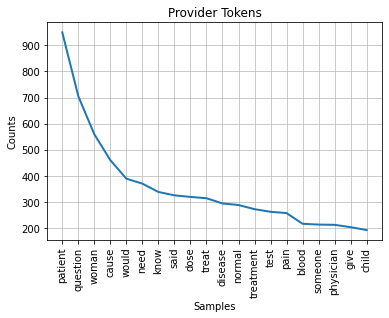

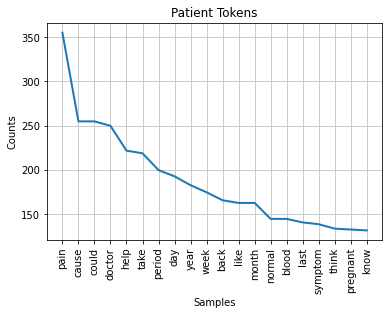

In [16]:
providersFD.plot(20, cumulative = False, title = 'Provider Tokens');
patientsFD.plot(20, cumulative = False, title = 'Patient Tokens');

Extract important words and phrases, filtering out words that are shorter than 5 characters in length to ignore preopositions, determiners, and interrogative words ("who", "what")

In [17]:
for token in dsFinal['patients']:
    if (len(token) >= 8):
        print ('%s [%s]' % (token, patientsFD[token]))

hospital [7]
probably [4]
stenosis [8]
concerned [21]
occasional [9]
irregular [22]
heartbeat [5]
apparent [4]
specialist [10]
unpleasant [1]
experience [18]
involved [3]
competitive [1]
mountain [1]
recently [69]
reasonably [1]
exercise [37]
acceptable [1]
overweight [5]
emotional [3]
uncomfortable [7]
tightness [11]
daughter [32]
suffering [10]
pericarditis [1]
injection [7]
cortisone [4]
pressure [50]
cholesterol [23]
breathless [1]
distance [2]
unwilling [1]
overcome [1]
shortness [7]
hospital [7]
discharged [1]
mother-in-law [3]
arthritis [24]
physiotherapist [1]
exercise [37]
fighting [1]
recently [69]
palpitation [8]
paroxysmal [1]
supraventricular [1]
tachycardia [1]
frequent [21]
distressing [2]
medication [77]
specialist [10]
suggested [5]
cautioned [1]
operation [3]
coronary [3]
continue [14]
arthritis [24]
responsible [2]
dangerous [14]
enlarged [12]
dangerous [14]
weakness [12]
cardiomyopathy [1]
explanation [1]
desperately [1]
daughter [32]
significant [5]
irregular [22]


chocolate [7]
anything [27]
teenager [5]
sexually [10]
recently [69]
ejaculating [1]
normally [9]
discharge [39]
ejaculation [10]
sexually [10]
fertility [4]
experiencing [49]
frequent [21]
clearing [2]
generator [2]
reaction [12]
allergic [18]
generator [2]
depo-provera [4]
sexually [10]
discharge [39]
increased [15]
discharge [39]
irritate [2]
teenager [5]
possible [53]
swallowing [5]
constant [11]
constant [11]
tickling [1]
swallowing [5]
feverish [1]
constantly [5]
addiction [2]
withdrawal [10]
struggling [2]
achondroplasia [2]
different [17]
achondroplasia [2]
grandmother [2]
appointment [24]
preparing [2]
hashimoto [2]
condition [21]
reversible [3]
hashimoto [2]
thyroiditis [1]
contraindicated [1]
catheter [4]
myocardial [4]
infarction [4]
information- [1]
catheter [4]
myocardial [4]
infarction [4]
involved [3]
possible [53]
erythromycin [2]
estolate [2]
prescription [6]
erythromycin [2]
estolate [2]
respiratory [3]
infection [69]
splashed [1]
irritation [9]
happened [9]
salmonel

lightheaded [3]
lightheaded [3]
placenta [2]
coincidence [1]
bleeding [64]
placenta [2]
numbness [33]
treatment [68]
hardware [2]
hardware [2]
alleviate [2]
numbness [33]
endocarditis [2]
unbearable [2]
headache [78]
recommend [13]
constant [11]
headache [78]
endocarditis [2]
anterior [1]
extremely [13]
headaches-so [1]
headache [78]
addition [1]
something [48]
moisturize [1]
cracking [1]
deficiency [11]
diagnosed [80]
bleeding [64]
deficiency [11]
penis.it [1]
foreskin [3]
disappearing.it [1]
appeared [4]
yesterday.what [1]
purplish [1]
discoloration [1]
numerous [1]
frequent [21]
literally [2]
bleeding [64]
prominent [4]
prescribed [50]
metronidazole [5]
bacteria [8]
infection [69]
metronidazole [5]
congestion [7]
antibiotic [38]
possible [53]
infection [69]
hypothyroidism [10]
recently [69]
extremity [1]
constantly [5]
autoimmune [5]
disorder [18]
hypothyroidism [10]
sometimes [25]
something [48]
autoimmune [5]
disorder [18]
psoriatic [3]
arthritis [24]
fibromyalgia [4]
psoriatic [3

negative [34]
binge-drinking [1]
drinking [12]
medication [77]
roflumilast [2]
medication [77]
roflumilast [2]
over-the-counter [3]
differentiate [6]
inflammation [10]
inflammation [10]
positive [26]
positive [26]
irritation [9]
irritate [2]
subchondroplasty [2]
procedure [18]
subchondroplasty [2]
procedure [18]
breakthrough [4]
bleeding [64]
honeymoon [2]
honeymoon [2]
breakthrough [4]
bleeding [64]
bleeding [64]
pregnancy [85]
differentiate [6]
pregnancy [85]
exercise [37]
recommended [8]
rehabilitating [1]
chondromalacia [4]
exercise [37]
recovery [12]
chondromalacia [4]
medication [77]
effective [18]
reducing [3]
eliminating [1]
medication [77]
perineum [2]
perineum [2]
preparation [1]
assisted [2]
planning [9]
assisted [2]
premature [9]
premature [9]
premature [9]
bodybuilding [4]
bodybuilding [4]
pregnant [133]
conception [7]
tingling [14]
numbness [33]
tingling [14]
neurofibromatosis [1]
touching [4]
applying [5]
polysporin [2]
bacitracin [2]
polymyxin [2]
overdose [9]
superfici

weakness [12]
suddenly [4]
tingling [14]
numbness [33]
concerned. [2]
possible [53]
metanephrine [2]
fractionated [2]
abnormal [13]
likelihood [3]
abnormal [13]
contrast [9]
metanephrine [2]
fractionated [2]
abnormal [13]
contrast [9]
likelihood [3]
abnormal [13]
claritin [5]
loratadine [2]
yesterday [30]
claritin [5]
loratadine [2]
technically [1]
overdose [9]
congestion [7]
allergic [18]
yesterday [30]
claritin [5]
unprotected [35]
antibiotic [38]
infection [69]
sensitive [9]
sensitive [9]
scaphoid [4]
ibuprofen [6]
scaphoid [4]
concerned [21]
unprotected [35]
periodthree [1]
bloodthat [1]
pregnant [133]
unprotected [35]
spotting [16]
pregnant [133]
unprotected [35]
klonopin [2]
clonazepam [1]
withdrawal [10]
diagnosed [80]
klonopin [2]
medication [77]
medication [77]
efficacy [1]
medication [77]
everything [7]
negative [34]
hemorrhoid [10]
bleeding [64]
hemorrhoid [10]
bleeding [64]
chlamydia [8]
breastfeed [2]
possible [53]
diagnosed [80]
chlamydia [8]
breastfeeding [6]
chlamydia [

In [18]:
for token in dsFinal['providers']:
    if (len(token) >= 8):
        print ('%s [%s]' % (token, patientsFD[token]))
        

walker-warburg [0]
syndrome [17]
syndrome [17]
pregnancy [85]
negative [34]
recently [69]
treatment [68]
leukocyte [2]
adhesion [2]
deficiency [11]
preliminary [0]
amniocentesis [0]
genotype [0]
presenting [0]
theophylline [0]
robitussin [0]
understand [11]
bronchopulmonary [0]
dysplasia [2]
vecuronium [0]
syndrome [17]
acyclovir [3]
phenobarbital [0]
dilantin [0]
counteract [0]
henoch-schoenlein [0]
population [0]
kussmaul [0]
breathing [11]
tracheostomy [0]
ventilator [0]
treatment [68]
diabetes [28]
insipidus [1]
desmopressin [0]
developmental [0]
behavioral [3]
pediatrics [0]
fellowship [0]
directory [0]
hypercarbia [0]
cardiovascular [0]
function [4]
hemoglobinopathy [0]
information [2]
interpret [0]
cerebrospinal [0]
intravenous [0]
antibiotic [38]
continued [0]
indicated [0]
hypertension [6]
post-streptococcal [0]
dysfibrinogenemia [0]
scleroderma [0]
appropriately [0]
stimulant [0]
abnormality [1]
effusion [0]
3-year-old [1]
pneumonia [0]
ursodiol [0]
paralytic [0]
demyelinatin

different [17]
antibiotic [38]
medication [77]
attention-deficit [0]
hyperactivity [0]
disorder [18]
treatment [68]
tyrosinemia [0]
syndrome [17]
vasopressin [0]
concentration [0]
preparation [1]
ventilatory [0]
management [4]
8-month-old [0]
respiratory [3]
distress [0]
starting [3]
klonopin [2]
clonazepam [1]
intractable [0]
circumcision [0]
properly [0]
respigam [0]
differential [0]
diagnosis [9]
recommendation [2]
treatment [68]
influenza [2]
bacterial [1]
meningitis [3]
ursodiol [0]
laboratory [0]
rhabdomyolysis [0]
administer [0]
meningococcal [0]
phenobarbital [0]
syndrome [17]
differential [0]
diagnosis [9]
treatment [68]
chediak-higashi [0]
syndrome [17]
depression [27]
bacterial [1]
endocarditis [2]
prophylactic [0]
antibiotic [38]
respiratory [3]
medication [77]
treatment [68]
prophylax [0]
chemotherapy [2]
developed [16]
overnight [0]
transplant [2]
arrhythmia [1]
ventricular [1]
arrhythmia [1]
procedure [18]
information [2]
bacterial [1]
infection [69]
thromboplastin [0]
3

34-year-old [0]
documented [0]
peritonsillar [0]
streptococcal [0]
pharyngitis [4]
peritonsillar [0]
40-year-old [0]
emergency [5]
hypomagnesemia [0]
potassium [6]
emergency [5]
magnesium [3]
magnesium [3]
treatment [68]
associated [9]
pulmonary [6]
coumadin [0]
postoperative [0]
hemorrhage [0]
surgical [6]
inferior [0]
question [10]
anticoagulant [0]
addition [1]
65-year-old [0]
available [8]
absorbed [1]
preparation [1]
73-year-old [0]
resected [0]
colonoscopy [5]
hyperplastic [0]
negative [34]
computerized [0]
tomography [0]
metastasis [1]
streptococcal [0]
investigator [0]
physician [0]
reference [0]
wondering [26]
prophylaxis [1]
vascular [0]
specifically [0]
concerned [21]
21-year-old [0]
function [4]
53-year-old [0]
testicular [3]
reference [0]
definition [5]
physician [0]
cryosurgery [0]
year-old [0]
adenomatous [0]
screened [0]
colonoscopy [5]
colonoscopy [5]
6-year-old [0]
sinusitis [2]
bronchopneumonia [0]
negative [34]
physician [0]
vitiligo [0]
autoimmune [5]
prophylaxis [

papanicolaou [0]
atypical [2]
squamous [0]
uncertain [0]
significance [0]
high-grade [0]
squamous [0]
intraepithelial [0]
normally [9]
atypical [2]
squamous [0]
uncertain [0]
significance [0]
30-year-old [0]
diabetes [28]
reference [0]
33-year-old [0]
bleeding [64]
positive [26]
pregnancy [85]
miscarriage [13]
beta-human [0]
chorionic [0]
gonadotrophin [0]
question [10]
regarding [4]
asymptomatic [3]
peripheral [0]
vascular [0]
1/2-year-old [0]
tympanogram [0]
eustachian [0]
dysfunction [5]
physician [0]
received [1]
question [10]
evaluation [1]
monoclonal [0]
gammopathy [0]
67-year-old [0]
hypertension [6]
question [10]
pressure [50]
differently [2]
systolic [1]
hypertension [6]
congenital [2]
syndrome [17]
decreased [2]
mobility [0]
wide-based [0]
methamphetamine [0]
exposure [3]
potential [2]
adoptive [0]
methamphetamine [0]
percocet [2]
physician [0]
mycobacterium [0]
gordonae [0]
6-year-old [0]
attention-deficit-hyperactivity-disorder [0]
evaluation [1]
thinking [9]
refresher [0]


additional [2]
50-year-old [0]
surrogate [0]
33-year-old [0]
appropriately [0]
estrogen [2]
switched [3]
trilevlen [0]
abnormal [13]
bleeding [64]
post-menopausal [0]
question [10]
54-year-old [0]
sensitivity [3]
specificity [0]
adenosine [0]
thallium [0]
dobutamine [0]
echocardiogram [0]
compared [4]
question [10]
tonsillar [0]
8-year-old [0]
wondered [1]
indication [1]
tonsillectomy [0]
year-old [0]
pressure [50]
6-month-old [0]
prolonged [0]
diarrhea [25]
question [10]
35-year-old [0]
gynecomastia [0]
question [10]
clinically [0]
developmental [0]
disorder [18]
increase [31]
increase [31]
medicine [27]
decrease [1]
question [10]
four-week [0]
diflucan [3]
37-year-old [0]
inpatient [0]
necrosis [0]
vomiting [21]
metastasis [1]
endometriosis [12]
vomiting [21]
radiographic [0]
obstruction [2]
tuberculin [0]
calmette-guerin [0]
calmette-guerin [0]
reference [0]
guideline [0]
previously [1]
positive [26]
positive [26]
82-year-old [0]
interesting [0]
question [10]
improves [1]
survival [

probably [4]
coumadin [0]
augmentin [0]
interact [4]
35-year-old [0]
frequency [4]
probably [4]
prostatitis [1]
urinalysis [1]
yesterday [30]
levoquin [0]
urinalysis [1]
negative [34]
negative [34]
50-year-old [0]
recurrent [6]
folliculitis [0]
anything [27]
6-month-old [0]
delivery [1]
developing [6]
normally [9]
question [10]
hypertonicity [0]
extremity [1]
scissoring [0]
definite [1]
magnetic [1]
resonance [0]
computerized [0]
tomography [0]
regarding [4]
two-month-old [0]
referred [5]
tertiary [0]
positive [26]
acceptable [1]
15-month-old [0]
prematurely [1]
syndrome [17]
functioning [0]
secondary [2]
amitriptyline [0]
bicarbonate [2]
criterion [0]
overdose [9]
bicarbonate [2]
physician [0]
60-year-old [0]
cholesterol [23]
triglyceride [5]
high-density-lipoprotein [0]
cholesterol [23]
low-density-lipoprotein [0]
cholesterol [23]
gemfibrozil [0]
question [10]
evidence [1]
nine-month-old [0]
lipomeningomyelocele [0]
meningomyelocele [0]
question [10]
retether [0]
unlikely [0]
strepto

question [10]
follicle [0]
stimulating [0]
hormone/luteinizing [0]
diagnosis [9]
polycystic [4]
syndrome [17]
recently [69]
gynecologist [1]
ordering [1]
gastroenteritis [0]
50-year-old [0]
alcoholic [2]
markedly [0]
elevated [3]
alkaline [3]
phosphatase [3]
elevated [3]
alkaline [3]
phosphatase [3]
magnetic [1]
resonance [0]
significance [0]
asymmetry [0]
transverse [0]
dominant [2]
question [10]
yesterday [30]
relative [0]
incidence [1]
streptococcal [0]
tonsillectomized [0]
three-and-a-half-month-old [0]
infected [10]
question [10]
perpetuate [0]
infection [69]
40-year-old [0]
repeated [2]
magnetic [1]
resonance [0]
persistent [2]
fracture [17]
position [7]
question [10]
continue [14]
conservative [1]
treatment [68]
immobilizer [0]
something [48]
seven-month-old [0]
prematurely [1]
munchausen [0]
followed [4]
tertiary [0]
question [10]
7-year-old [0]
abdominal [43]
question [10]
allergist [1]
allergist [1]
evaluation [1]
question [10]
prostate-specific [0]
conversation [0]
physician

oppositional [0]
attention [0]
disorder [18]
syndrome [17]
oppositional [0]
disorder [18]
whatever [0]
regarding [4]
2-year-old [1]
approximately [0]
multiple [5]
complaint [0]
supposed [5]
suspicious [0]
depressed [6]
selective [0]
serotonin [0]
reuptake [0]
inhibitor [0]
traditional [0]
depression [27]
complaint [0]
selective [0]
serotonin [0]
reuptake [0]
inhibitor [0]
fractured [2]
question [10]
physician [0]
80-year-old [0]
replacement [3]
preoperative [0]
physical [2]
different [17]
melanoma [1]
45-year-old [0]
physician [0]
question [10]
27-year-old [0]
miscarriage [13]
actually [9]
anticardiolipin [0]
antibody [7]
question [10]
60-year-old [0]
obstruction [2]
clinically [0]
computerized [0]
tomography [0]
admitted [0]
esphogagogastroduodenoscopy [0]
outpatient [0]
outpatient [0]
81-year-old [0]
separate-structure [0]
retirement [0]
basement [0]
exposure [3]
magazine [0]
hemoptysis [0]
irregular [22]
menstrual [7]
bleeding [64]
depo-provera [4]
spotting [16]
contraceptive [4]
am

well-child [0]
supposed [5]
gastrointestinal [1]
remember [0]
question [10]
recently [69]
polycystic [4]
syndrome [17]
23-year-old [0]
developed [16]
absolute [0]
neutrophil [0]
tapazole [0]
neutrophil [0]
reactivity [0]
tapazole [0]
propylthiouracil [0]
propylthiouracil [0]
physician [0]
physician [0]
4-day-old [0]
jaundice [1]
bilirubin [2]
guideline [0]
transfuse [0]
conservative [1]
premature [9]
positive [26]
respiratory [3]
syncytial [0]
question [10]
continue [14]
respiratory [3]
syncytial [0]
13-year-old [0]
physical [2]
question [10]
differential [0]
diagnosis [9]
intermittent [0]
52-pound [0]
37-year-old [0]
diabetic [13]
question [10]
conversion [0]
question [10]
75-year-old [0]
metabolism [0]
kyphosis [0]
question [10]
compression [3]
fracture [17]
mid-thoracic [0]
turnover [0]
36-year-old [0]
question [10]
mandatory [0]
pressure [50]
investigator [0]
question [10]
hypertension [6]
84-year-old [0]
escherichia [0]
negative [34]
urinalysis [1]
9-year-old [0]
recurrent [6]
abd

hematuria [4]
question [10]
interpret [0]
antistreptolysin [0]
glomerulonephritis [0]
antistreptolysin [0]
elevated [3]
reaction [12]
hydrocortisone [3]
ingredient [3]
preparation [1]
equivalent [0]
premarin [0]
hypertension [6]
pressure [50]
overheard [0]
telephone [0]
conversation [0]
hospital [7]
pharmacist [0]
hospital [7]
question [10]
glucophage [0]
shortness [7]
shortness [7]
normally [9]
28-year-old [0]
concerned [21]
pulmonary [6]
embolism [3]
diabetic [13]
yesterday [30]
glucotrol [0]
wondered [1]
glucotrol [0]
associated [9]
insomnia [1]
imipramine [0]
10-year-old [0]
balanitis [0]
balanitis [0]
differential [0]
diagnosis [9]
significant [5]
medication [77]
premarin [0]
elevated [3]
metanephrines [0]
protocol [0]
maintenance [0]
organization [0]
supposed [5]
probably [4]
respiratory [3]
infection [69]
considered [15]
overweight [5]
anything [27]
medication [77]
developmental [0]
screening [0]
appropriate [0]
pharyngitis [4]
streptococcus [0]
nonfasting [0]
approximately [0]


hypercholesterolemia [0]
diagnosis [9]
impetigo [0]
81-year-old [0]
terrible [0]
infusion [0]
hemoglobin [4]
approximately [0]
yesterday [30]
reticulocyte [0]
approximately [0]
45-year-old [0]
dialysis [1]
headache [78]
dialysis [1]
question [10]
dialysis [1]
procedure [18]
accelerate [1]
headache [78]
metatarsal [0]
fracture [17]
anything [27]
postherpetic [0]
neuralgia [0]
pancreatitis [0]
resolved [1]
abnormal [13]
fracture [17]
complicated [0]
osteomyelitis [0]
degeneration [0]
discomfort [10]
multiple [5]
accident [10]
orthopedist [0]
negative [34]
discovered [2]
immunization [0]
midnight [0]
employment [0]
physical [2]
question [10]
appropriate [0]
depression [27]
preferred [0]
particular [3]
treating [6]
hypercholesterolemia [0]
treatment [68]
melatonin [2]
indicated [0]
insomnia [1]
mycoplasma [0]
respiratory [3]
pathogen [0]
thinking [9]
appropriately [0]
mycoplasma [0]
abdominal [43]
aneurysm [4]
centimeter [0]
diverticulitis [7]
abdominal [43]
periodically [0]
abdominal [43]

anything [27]
treatment [68]
hepatitis [1]
injection [7]
54-year-old [0]
hypothyroid [0]
stimulating [0]
happened [9]
hypothyroid [0]
effective [18]
diagnose [11]
sinusitis [2]
prescription [6]
correctly [0]
strength [2]
centimeter [0]
immunocompromised [0]
pulmonary [6]
contraceptive [4]
progress [1]
ventilation-perfusion [0]
abnormal [13]
antidepressant [8]
obstructive [0]
pulmonary [6]
moderately [2]
controlled [4]
hemoglobin [4]
glycosylated [0]
hemoglobin [4]
criterion [0]
diabetes [28]
milligram [0]
expensive [0]
ipratropium [0]
ultrasound [26]
diagnosis [9]
prednisone [8]
temporal [0]
arteritis [0]
prednisone [8]
fluttering [0]
diverticulitis [7]
diverticulitis [7]
19-year-old [0]
somebody [3]
appointment [24]
eustachian [0]
dysfunction [5]
effective [18]
considering [0]
temporomandibular [0]
syndrome [17]
haemophilus [0]
influenza [2]
dehydrogenase [0]
dehydrogenase [0]
interfere [3]
anesthetic [1]
dicyclomine [0]
baclofen [0]
progressing [0]
regarding [4]
syndrome [17]
sensiti

pseudonormalization [0]
mentioned [5]
electrocardiogram [0]
elongated [0]
transverse [0]
subcutaneous [0]
rimantadine [0]
flumadine [0]
significance [0]
temperature [8]
instability [0]
especially [6]
temperature [8]
neonatal [0]
pregnant [133]
papanicolaou [0]
following [5]
hysterectomy [9]
marijuana [4]
cannabis [0]
depression [27]
albuterol [5]
nebulizer [0]
treatment [68]
dichotomous [0]
variable [0]
continuous [1]
independent [0]
variable [0]
streptococcal [0]
prevention [0]
screening [0]
treatment [68]
pregnancy [85]
indication [1]
contraindication [1]
glucophage [0]
metformin [0]
tetramune [0]
acellular [0]
pertussis [0]
pediatric [1]
schedule [3]
diagnosis [9]
pseudotumor [0]
intracranial [0]
hypertension [6]
diagnose [11]
carotidynia [0]
whooping [0]
pertussis [0]
captopril [0]
diabetic [13]
microalbuminuria [0]
diabetic [13]
nephropathy [2]
function [4]
glitazones [0]
rosiglitazone [0]
pneumonia [0]
dehydrogenase [0]
aspartate [0]
aminotransferase [0]
differential [0]
diagnosi

flushing [0]
endarterectomy [0]
indication [1]
guideline [0]
indication [1]
tonsillectomy [0]
reference [0]
abnormal [13]
function [4]
apparently [0]
ferritin [2]
capacity [0]
diagnose [11]
willebrand [0]
congenital [2]
hyperplasia [0]
nicotine [3]
coronary [3]
premature [9]
35-weeks [0]
gestation [0]
premature [9]
prematurity [0]
toxicology [0]
antidepressant [8]
overdose [9]
progesterone [4]
depo-provera [4]
resistant [0]
versicolor [1]
standard [1]
standard [1]
deviation [0]
variance [0]
coumadin [0]
prothrombin [0]
year-old [0]
irregular [22]
bleeding [64]
psychiatric [1]
impression [0]
psychiatric [1]
diagnosis [9]
diagnosed [80]
respiratory [3]
syncytial [0]
indication [1]
thrombectomy [0]
thrombolytic [0]
deep-vein [0]
thrombosis [3]
incontinent [0]
otherwise [2]
asymptomatic [3]
infection [69]
antibiotic [38]
danocrine [0]
fibrocystic [1]
artificial [2]
documented [0]
streptococcal [0]
penicillin [9]
behavior [2]
girlfriend [7]
babysitter [0]
maternal [0]
fetoprotein [0]
amnioc

reference [0]
indicate [4]
american [5]
screened [0]
toxoplasmosis [0]
criterion [0]
syndrome [17]
postprandial [0]
explosive [0]
lo-estrin [0]
asymptomatic [3]
compatible [0]
association [1]
cessation [0]
depression [27]
quitting [5]
depression [27]
variability [0]
periodic [1]
deceleration [0]
nonreassuring [0]
effusion [0]
reference [0]
iterative [0]
hypothesis [0]
medicine [27]
binomial [0]
distribution [0]
calculate [4]
montevideo [0]
diarrhea [25]
treatment [68]
external [1]
asymptomatic [3]
intrapartum [0]
positive [26]
streptococcus [0]
headache [78]
sweating [5]
occuring [0]
c-reactive [0]
temporal [0]
arteritis [0]
polymyalgia [0]
rheumatica [0]
treating [6]
gestational [0]
diabetic [13]
physical [2]
examination [3]
mexiletine [0]
commercially [0]
available [8]
clinically [0]
isolated [1]
hypophosphatemia [0]
nonsteroidal [0]
antiinflammatory [0]
hypophosphatemia [0]
posterior [3]
fontanelle [0]
hematuria [4]
diffusing [0]
capacity [0]
38-year-old [0]
exertion [2]
angiotensin

stimulant [0]
laxative [2]
captopril [0]
diabetic [13]
microalbuminuria [0]
diabetic [13]
treating [6]
thorazine [0]
insomnia [1]
agitation [0]
intravenous [0]
pyelogram [0]
elevation [0]
immunoglobulin [0]
immunoglobulin [0]
tramadol [0]
comparative [0]
sensitivity [3]
specificity [0]
oxytocin [0]
contraction [0]
nonstress [0]
oxytocin [0]
contraction [0]
sensitive [9]
nonstress [0]
nonreactive [0]
oxytocin [0]
contraction [0]
menopause [6]
osteoporosis [2]
protection [1]
protection [1]
raloxifene [0]
selective [0]
estrogen [2]
receptor [0]
modulators [0]
estrogen [2]
bisphosphonates [0]
alendronate [0]
complains [0]
hyperhidrosis [0]
sweating [5]
amnionic [0]
dehydrogenase [0]
alkaline [3]
phosphatase [3]
streptococcal [0]
resistant [0]
penicillin [9]
mammography [0]
ultrasound [26]
aspirate [0]
consistent [0]
syndrome [17]
male-pattern [0]
baldness [1]
alopecia [0]
minoxidil [5]
propecia [0]
finasteride [0]
dilatation [0]
curettage [0]
completed [2]
spontaneous [0]
abortion [16]
mar

#### Collocations, 2-grams & Co-Occurences

In [19]:
dsFinal['patients']
dsFinal['patients'] = nltk.Text(dsFinal['patients'])
dsFinal['patients'].collocation_list()

[('hello', 'doctor'),
 ('birth', 'control'),
 ('side', 'effect'),
 ('blood', 'pressure'),
 ('lymph', 'node'),
 ('yeast', 'infection'),
 ('burning', 'sensation'),
 ('right', 'side'),
 ('week', 'pregnant'),
 ('lower', 'back'),
 ('long', 'term'),
 ('high', 'blood'),
 ('blood', 'clot'),
 ('heart', 'rate'),
 ('heart', 'attack'),
 ('please', 'help'),
 ('feel', 'like'),
 ('look', 'like'),
 ('could', 'cause'),
 ('chest', 'pain')]

In [20]:
dsFinal['providers']
dsFinal['providers'] = nltk.Text(dsFinal['providers'])
dsFinal['providers'].collocation_list()

[('study', 'physician'),
 ('magnetic', 'resonance'),
 ('resonance', 'imaging'),
 ('would', 'cause'),
 ('computerized', 'tomography'),
 ('blood', 'pressure'),
 ('differential', 'diagnosis'),
 ('sore', 'throat'),
 ('side', 'effect'),
 ('papanicolaou', 'smear'),
 ('emergency', 'room'),
 ('phone', 'call'),
 ('stimulating', 'hormone'),
 ('urinary', 'tract'),
 ('obstructive', 'pulmonary'),
 ('atrial', 'fibrillation'),
 ('otitis', 'medium'),
 ('thyroid', 'stimulating'),
 ('chronic', 'obstructive'),
 ('myocardial', 'infarction')]

In [21]:
from nltk.collocations import *
from nltk.util import ngrams

print ('Generating bigrams')
bigrams = ngrams(dsFinal['patients'],2)
for bigram in bigrams:
    print (bigram)

Generating bigrams
('need', 'know')
('know', 'heart')
('heart', 'work')
('work', 'school')
('school', 'project')
('project', 'tell')
('tell', 'please')
('please', 'many')
('many', 'beat')
('beat', 'normal')
('normal', 'heart')
('heart', 'minute')
('minute', 'heart')
('heart', 'wake')
('wake', 'morning')
('morning', 'still')
('still', 'beat')
('beat', 'time')
('time', 'minute')
('minute', 'hospital')
('hospital', 'doctor')
('doctor', 'said')
('said', 'probably')
('probably', 'mitral')
('mitral', 'valve')
('valve', 'stenosis')
('stenosis', 'serious')
('serious', 'concerned')
('concerned', 'occasional')
('occasional', 'irregular')
('irregular', 'heartbeat')
('heartbeat', 'apparent')
('apparent', 'cause')
('cause', 'happens')
('happens', 'week')
('week', 'three')
('three', 'beat')
('beat', 'woman')
('woman', 'would')
('would', 'like')
('like', 'know')
('know', 'could')
('could', 'wife')
('wife', 'told')
('told', 'funny')
('funny', 'turn')
('turn', 'tell')
('tell', 'asked')
('asked', 'speci

('compared', 'rest')
('rest', 'class')
('class', 'problem')
('problem', 'make')
('make', 'better')
('better', 'supplement')
('supplement', 'help')
('help', 'since')
('since', 'child')
('child', 'joint')
('joint', 'always')
('always', 'clicked')
('clicked', 'year')
('year', 'painful')
('painful', 'special')
('special', 'rain')
('rain', 'cold')
('cold', 'currently')
('currently', 'past')
('past', 'history')
('history', 'joint')
('joint', 'issue')
('issue', 'started')
('started', 'experiencing')
('experiencing', 'pain')
('pain', 'joint')
('joint', 'rainy')
('rainy', 'cold')
('cold', 'season')
('season', 'related')
('related', 'childhood')
('childhood', 'habit')
('habit', 'clicking')
('clicking', 'joint')
('joint', 'treated')
('treated', 'caused')
('caused', 'dose')
('dose', 'azithromycin')
('azithromycin', 'injection')
('injection', 'antibiotic')
('antibiotic', 'never')
('never', 'went')
('went', 'away')
('away', 'itching')
('itching', 'vaginal')
('vaginal', 'discharge')
('discharge', 'ye

('discharge', 'havent')
('havent', 'started')
('started', 'mean')
('mean', 'irregular')
('irregular', 'period')
('period', 'brown')
('brown', 'vaginal')
('vaginal', 'discharge')
('discharge', 'mean')
('mean', 'pregnant')
('pregnant', 'black')
('black', 'scar')
('scar', 'look')
('look', 'something')
('something', 'light')
('light', 'color')
('color', 'month')
('month', 'away')
('away', 'noticed')
('noticed', 'black')
('black', 'scarring')
('scarring', 'could')
('could', 'away')
('away', 'bruise')
('bruise', 'circling')
('circling', 'insect')
('insect', 'bite')
('bite', 'common')
('common', 'differentiate')
('differentiate', 'simple')
('simple', 'bite')
('bite', 'spider')
('spider', 'bite')
('bite', 'bite')
('bite', 'keep')
('keep', 'getting')
('getting', 'worse')
('worse', 'recommend')
('recommend', 'know')
('know', 'simple')
('simple', 'bite')
('bite', 'spider')
('spider', 'bite')
('bite', 'burning')
('burning', 'sensation')
('sensation', 'part')
('part', 'breast')
('breast', 'day')
('

('help', 'soon')
('soon', 'medical')
('medical', 'abortion')
('abortion', 'conceive')
('conceive', 'cause')
('cause', 'hungry')
('hungry', 'hour')
('hour', 'meal')
('meal', 'upper')
('upper', 'abdominal')
('abdominal', 'pain')
('pain', 'burning')
('burning', 'sensation')
('sensation', 'every')
('every', 'time')
('time', 'meal')
('meal', 'burning')
('burning', 'sensation')
('sensation', 'pain')
('pain', 'upper')
('upper', 'abdomen')
('abdomen', 'feel')
('feel', 'hungry')
('hungry', 'could')
('could', 'cause')
('cause', 'blister')
('blister', 'thing')
('thing', 'tongue')
('tongue', 'blister')
('blister', 'tongue')
('tongue', 'since')
('since', 'week')
('week', 'could')
('could', 'causing')
('causing', 'could')
('could', 'make')
('make', 'breast')
('breast', 'bigger')
('bigger', 'naturally')
('naturally', 'natuarally')
('natuarally', 'breast')
('breast', 'exercise')
('exercise', 'food')
('food', 'medical')
('medical', 'physicist')
('physicist', 'cancer')
('cancer', 'treatment')
('treatmen

('skin', 'disease')
('disease', 'cause')
('cause', 'boil')
('boil', 'doctor')
('doctor', 'gave')
('gave', 'medicine')
('medicine', 'soap')
('soap', 'wash')
('wash', 'also')
('also', 'eczema')
('eczema', 'skin.')
('skin.', 'serious')
('serious', 'concerning')
('concerning', 'month')
('month', 'daughter')
('daughter', 'mrsa')
('mrsa', 'eczema')
('eczema', 'really')
('really', 'worried')
('worried', 'small')
('small', 'serious')
('serious', 'skin')
('skin', 'issues.')
('issues.', 'cycle')
('cycle', 'start')
('start', 'clomid')
('clomid', 'day')
('day', 'intercourse')
('intercourse', 'pcos')
('pcos', 'trying')
('trying', 'conceive')
('conceive', 'doctor')
('doctor', 'advised')
('advised', 'clomid')
('clomid', 'wanted')
('wanted', 'know')
('know', 'sexual')
('sexual', 'intercourse')
('intercourse', 'increase')
('increase', 'chance')
('chance', 'getting')
('getting', 'pregnant')
('pregnant', 'took')
('took', 'clomid')
('clomid', 'day')
('day', 'cycle')
('cycle', 'ovulate')
('ovulate', 'would

('necessary', 'drink')
('drink', 'salt')
('salt', 'water')
('water', 'condition')
('condition', 'drinking')
('drinking', 'saline')
('saline', 'water')
('water', 'recommended')
('recommended', 'whether')
('whether', 'cooking')
('cooking', 'coconut')
('coconut', 'affect')
('affect', 'cholesterol')
('cholesterol', 'triglyceride')
('triglyceride', 'level')
('level', 'worried')
('worried', 'health')
('health', 'father')
('father', 'diagnosed')
('diagnosed', 'high')
('high', 'cholesterol')
('cholesterol', 'triglyceride')
('triglyceride', 'level')
('level', 'doctor')
('doctor', 'suggested')
('suggested', 'coconut')
('coconut', 'cooking')
('cooking', 'like')
('like', 'taste')
('taste', 'option')
('option', 'cooking')
('cooking', 'besides')
('besides', 'coconut')
('coconut', 'good')
('good', 'manage')
('manage', 'high')
('high', 'cholesterol')
('cholesterol', 'triglyceride')
('triglyceride', 'level')
('level', 'body')
('body', 'part')
('part', 'donated')
('donated', 'someone')
('someone', 'dona

('twitching', 'cause')
('cause', 'slight')
('slight', 'spasm.')
('spasm.', 'treat')
('treat', 'eyelid')
('eyelid', 'twitching')
('twitching', 'spasm')
('spasm', 'home')
('home', 'people')
('people', 'liver')
('liver', 'transplant')
('transplant', 'cirrhosis')
('cirrhosis', 'latest')
('latest', 'stage')
('stage', 'always')
('always', 'develop')
('develop', 'hepatic')
('hepatic', 'aneurysm')
('aneurysm', 'person')
('person', 'heart')
('heart', 'disease')
('disease', 'develop')
('develop', 'hepatic')
('hepatic', 'aneurysm')
('aneurysm', 'also')
('also', 'undergo')
('undergo', 'liver')
('liver', 'transplant')
('transplant', 'stage')
('stage', 'liver')
('liver', 'cirrhosis')
('cirrhosis', 'please')
('please', 'help')
('help', 'past')
('past', 'year')
('year', 'started')
('started', 'problem')
('problem', 'stay')
('stay', 'erect')
('erect', 'masturbating')
('masturbating', 'cialis')
('cialis', 'stop')
('stop', 'working')
('working', 'cialis')
('cialis', 'month')
('month', 'notice')
('notice'

('regular', 'either')
('either', 'pain')
('pain', 'sexually')
('sexually', 'transmitted')
('transmitted', 'infection')
('infection', 'cause')
('cause', 'post')
('post', 'coital')
('coital', 'bleeding')
('bleeding', 'sized')
('sized', 'bump')
('bump', 'wrist')
('wrist', 'kinda')
('kinda', 'hard')
('hard', 'also')
('also', 'soft')
('soft', 'touch')
('touch', 'move')
('move', 'tendon')
('tendon', 'mildly')
('mildly', 'irritating.')
('irritating.', 'cause')
('cause', 'hard')
('hard', 'sized')
('sized', 'lump')
('lump', 'wrist')
('wrist', 'move')
('move', 'tendon')
('tendon', 'tiny')
('tiny', 'lump')
('lump', 'upper')
('upper', 'left')
('left', 'side')
('side', 'back')
('back', 'month')
('month', 'like')
('like', 'little')
('little', 'grey')
('grey', 'spot')
('spot', 'please')
('please', 'help')
('help', 'cause')
('cause', 'tiny')
('tiny', 'lump')
('lump', 'come')
('come', 'upper')
('upper', 'left')
('left', 'side')
('side', 'back')
('back', 'like')
('like', 'grey')
('grey', 'spot')
('spot'

('night', 'phone')
('phone', 'becomes')
('becomes', 'somewhat')
('somewhat', 'blurry')
('blurry', 'relieve')
('relieve', 'strain')
('strain', 'using')
('using', 'electronic')
('electronic', 'device')
('device', 'night')
('night', 'blood')
('blood', 'pressure')
('pressure', '140/88')
('140/88', 'little')
('little', 'high')
('high', '140/88')
('140/88', 'normal')
('normal', 'bright')
('bright', 'spotting')
('spotting', 'period')
('period', '6days')
('6days', 'light')
('light', 'spotting')
('spotting', 'past')
('past', 'cycle')
('cycle', 'last')
('last', 'month')
('month', 'period')
('period', 'lasted')
('lasted', 'day')
('day', 'worried')
('worried', 'hormone')
('hormone', 'think')
('think', 'going')
('going', 'menopause')
('menopause', 'frequent')
('frequent', 'spotting')
('spotting', 'day')
('day', 'even')
('even', 'period')
('period', 'last')
('last', 'year')
('year', 'period')
('period', 'also')
('also', 'last')
('last', 'longer')
('longer', 'usual')
('usual', 'think')
('think', 'dem

('side-effects', 'expect')
('expect', 'fluphenazine')
('fluphenazine', 'tuberous')
('tuberous', 'sclerosis')
('sclerosis', 'insurance')
('insurance', 'cover')
('cover', 'laser')
('laser', 'treatment')
('treatment', 'angiofibromas')
('angiofibromas', 'best')
('best', 'treatment')
('treatment', 'angiofibromas')
('angiofibromas', 'laser')
('laser', 'treatment')
('treatment', 'ineffective.')
('ineffective.', 'tell')
('tell', 'tuberous')
('tuberous', 'sclerosis')
('sclerosis', 'manage')
('manage', 'better')
('better', 'contra-indications')
('contra-indications', 'lasik')
('lasik', 'lasik')
('lasik', 'used')
('used', 'treat')
('treat', 'far-sightness')
('far-sightness', 'near-sightedness')
('near-sightedness', 'main')
('main', 'sign')
('sign', 'staph')
('staph', 'infection')
('infection', 'know')
('know', 'staph')
('staph', 'infection')
('infection', 'cause')
('cause', 'cancer')
('cancer', 'underneath')
('underneath', 'factor')
('factor', 'trigger')
('trigger', 'cancer')
('cancer', 'form')
(

('left', 'nasal')
('nasal', 'feel')
('feel', 'like')
('like', 'bone')
('bone', 'hurt')
('hurt', 'left')
('left', 'nasal')
('nasal', 'cold')
('cold', 'week')
('week', 'started')
('started', 'experiencing')
('experiencing', 'severe')
('severe', 'headache')
('headache', 'pain')
('pain', 'left')
('left', 'nostril')
('nostril', 'yesterday')
('yesterday', 'related')
('related', 'bone')
('bone', 'left')
('left', 'nostril')
('nostril', 'hysterectomy')
('hysterectomy', 'removal')
('removal', 'tube')
('tube', 'ovary')
('ovary', 'however')
('however', 'year')
('year', 'later')
('later', 'painful')
('painful', 'area')
('area', 'pelvis')
('pelvis', 'told')
('told', 'endometriosis')
('endometriosis', 'possible')
('possible', 'diagnosed')
('diagnosed', 'endometriosis')
('endometriosis', 'doctor')
('doctor', 'yesterday')
('yesterday', 'hurt')
('hurt', 'pelvic')
('pelvic', 'area')
('area', 'disturbs')
('disturbs', 'daily')
('daily', 'routine')
('routine', 'uterus')
('uterus', 'tube')
('tube', 'ovary')


('take', 'symptom')
('symptom', 'subside')
('subside', 'completely')
('completely', 'obsessive')
('obsessive', 'compulsive')
('compulsive', 'disorder')
('disorder', 'tourette')
('tourette', 'syndrome')
('syndrome', 'tourette')
('tourette', 'syndrome')
('syndrome', 'since')
('since', 'childhood')
('childhood', 'think')
('think', 'obsessive')
('obsessive', 'compulsive')
('compulsive', 'disorder')
('disorder', 'recently')
('recently', 'chance')
('chance', 'coexist')
('coexist', 'cause')
('cause', 'lower')
('lower', 'back')
('back', 'pain')
('pain', 'woman')
('woman', 'aunt')
('aunt', 'lower')
('lower', 'back')
('back', 'ache')
('ache', 'last')
('last', 'couple')
('couple', 'year')
('year', 'getting')
('getting', 'worse')
('worse', 'attained')
('attained', 'menopause')
('menopause', 'recommended')
('recommended', 'calcium')
('calcium', 'supplement')
('supplement', 'doctor')
('doctor', 'trying')
('trying', 'anything')
('anything', 'else')
('else', 'relief')
('relief', 'test')
('test', 'done

('sickness', 'week')
('week', 'since')
('since', 'positive')
('positive', 'test')
('test', 'true')
('true', 'positive')
('positive', 'positive')
('positive', 'pregnancy')
('pregnancy', 'test')
('test', 'today')
('today', 'morning')
('morning', 'sickness')
('sickness', 'help')
('help', 'irregular')
('irregular', 'period')
('period', '144/101')
('144/101', 'normal')
('normal', 'think')
('think', 'need')
('need', 'local')
('local', 'doctor')
('doctor', '144/101')
('144/101', 'mmhg')
('mmhg', 'almost')
('almost', 'week')
('week', 'pregnant')
('pregnant', 'ultrasound')
('ultrasound', 'done')
('done', 'high')
('high', 'risk')
('risk', 'appt')
('appt', 'today')
('today', 'baby')
('baby', 'growth')
('growth', 'rate')
('rate', 'percentile')
('percentile', 'weight')
('weight', 'go')
('go', 'baby')
('baby', 'still')
('still', 'healthy')
('healthy', 'delivery')
('delivery', 'detail')
('detail', 'ultrasound')
('ultrasound', 'done')
('done', 'week')
('week', 'high')
('high', 'risk')
('risk', 'appoin

('anyone', 'know')
('know', 'acid')
('acid', 'indigestion')
('indigestion', 'easily')
('easily', 'acid')
('acid', 'reflux')
('reflux', 'treated')
('treated', 'seem')
('seem', 'cough')
('cough', 'known')
('known', 'smoker')
('smoker', 'well')
('well', 'worried')
('worried', 'operating')
('operating', 'small')
('small', 'aircraft')
('aircraft', 'time')
('time', 'lead')
('lead', 'permanent')
('permanent', 'hearing')
('hearing', 'loss')
('loss', 'permanent')
('permanent', 'hearing')
('hearing', 'loss')
('loss', 'occur')
('occur', 'operating')
('operating', 'small')
('small', 'aircraft')
('aircraft', 'time')
('time', 'gonorrhea')
('gonorrhea', 'smell')
('smell', 'think')
('think', 'gonorrhea')
('gonorrhea', 'discharge')
('discharge', 'gonorrhea')
('gonorrhea', 'foul')
('foul', 'smelling')
('smelling', 'small')
('small', 'child')
('child', 'eventually')
('eventually', 'outgrow')
('outgrow', 'anal')
('anal', 'skin')
('skin', 'tag')
('tag', 'anal')
('anal', 'skin')
('skin', 'tag')
('tag', 'usu

('never', 'happened')
('happened', 'earlier')
('earlier', 'take')
('take', 'plan')
('plan', 'thrice')
('thrice', 'last')
('last', 'month')
('month', 'affect')
('affect', 'period')
('period', 'orthostatic')
('orthostatic', 'hypotension')
('hypotension', 'table')
('table', 'salt')
('salt', 'pint')
('pint', 'water')
('water', 'time')
('time', 'drink')
('drink', 'overdose')
('overdose', 'salt')
('salt', 'male')
('male', 'think')
('think', 'orthostatic')
('orthostatic', 'hypotension')
('hypotension', 'wondering')
('wondering', 'antidepressant')
('antidepressant', 'could')
('could', 'causing')
('causing', 'taking')
('taking', 'dose')
('dose', 'higher')
('higher', 'given')
('given', 'doctor')
('doctor', 'could')
('could', 'result')
('result', 'overdose')
('overdose', 'pain')
('pain', 'right')
('right', 'stomach')
('stomach', 'sister')
('sister', 'pain')
('pain', 'middle')
('middle', 'upper')
('upper', 'abdomen')
('abdomen', 'feeling')
('feeling', 'full')
('full', 'early')
('early', 'given')
(

('internal', 'stimulator')
('stimulator', 'previous')
('previous', 'fusion')
('fusion', 'growth')
('growth', 'surgery')
('surgery', 'inner')
('inner', 'right')
('right', 'ankle')
('ankle', '1.4cm')
('1.4cm', 'mass')
('mass', 'thats')
('thats', 'bone')
('bone', 'nerve')
('nerve', 'nerve')
('nerve', 'might')
('might', 'connected')
('connected', 'incision')
('incision', 'mass')
('mass', 'inner')
('inner', 'right')
('right', 'ankle')
('ankle', 'bone')
('bone', 'nerve')
('nerve', 'planned')
('planned', 'surgery')
('surgery', 'could')
('could', 'apprise')
('apprise', 'incision')
('incision', 'excise')
('excise', 'mass')
('mass', 'feel')
('feel', 'small')
('small', 'lymph')
('lymph', 'node')
('node', 'neck')
('neck', 'doctor')
('doctor', 'said')
('said', 'normal.i')
('normal.i', 'little')
('little', 'worry.but')
('worry.but', 'rest')
('rest', 'lymph')
('lymph', 'node')
('node', 'feel')
('feel', 'them.')
('them.', 'feel')
('feel', 'lymph')
('lymph', 'node')
('node', 'neck')
('neck', 'doctor')


('symptom', 'acute')
('acute', 'could')
('could', 'educate')
('educate', 'main')
('main', 'symptom')
('symptom', 'condom')
('condom', 'tear')
('tear', 'intercourse')
('intercourse', 'condom')
('condom', 'tear')
('tear', 'intercourse')
('intercourse', 'supplement')
('supplement', 'vitamin')
('vitamin', 'take')
('take', 'would')
('would', 'increase')
('increase', 'blood')
('blood', 'circulation')
('circulation', 'knee')
('knee', 'knee')
('knee', 'issue')
('issue', 'supplement')
('supplement', 'vitamin')
('vitamin', 'take')
('take', 'increase')
('increase', 'blood')
('blood', 'circulation')
('circulation', 'knee')
('knee', 'symptom')
('symptom', 'strep')
('strep', 'throat')
('throat', 'could')
('could', 'apprise')
('apprise', 'symptom')
('symptom', 'strep')
('strep', 'throat')
('throat', 'test')
('test', 'done')
('done', 'figure')
('figure', 'circulation')
('circulation', 'problem')
('problem', 'thigh')
('thigh', 'sometimes')
('sometimes', 'standing')
('standing', 'long')
('long', 'exer')

('something', 'mess')
('mess', 'stomach')
('stomach', 'diarrhea')
('diarrhea', 'diarrhea')
('diarrhea', 'constipation')
('constipation', 'fever')
('fever', 'nausea')
('nausea', 'bloating')
('bloating', 'healthy')
('healthy', 'smoke')
('smoke', 'exercise')
('exercise', 'regularly')
('regularly', 'stress')
('stress', 'using')
('using', 'bathroom')
('bathroom', 'cleaning')
('cleaning', 'toilet')
('toilet', 'finished')
('finished', 'bandaid')
('bandaid', 'hand')
('hand', 'raised')
('raised', 'seat')
('seat', 'clean')
('clean', 'looked')
('looked', 'like')
('like', 'blood')
('blood', 'hand')
('hand', 'cutting')
('cutting', 'vegetable')
('vegetable', 'applied')
('applied', 'bandaid')
('bandaid', 'bleeding')
('bleeding', 'stopped')
('stopped', 'need')
('need', 'take')
('take', 'injection')
('injection', 'would')
('would', 'like')
('like', 'help')
('help', 'toddler')
('toddler', 'cure')
('cure', 'yeast')
('yeast', 'infection')
('infection', 'hello')
('hello', 'doctor')
('doctor', 'please')
('p

In [22]:
print ('Generating bigrams')
bigrams = ngrams(dsFinal['providers'],2)
for bigram in bigrams:
    print (bigram)

Generating bigrams
('walker-warburg', 'syndrome')
('syndrome', 'noonan')
('noonan', 'syndrome')
('syndrome', 'pregnancy')
('pregnancy', 'test')
('test', 'negative')
('negative', 'today')
('today', 'patient')
('patient', 'recently')
('recently', 'check')
('check', 'proper')
('proper', 'treatment')
('treatment', 'bite')
('bite', 'test')
('test', 'leukocyte')
('leukocyte', 'adhesion')
('adhesion', 'deficiency')
('deficiency', 'preliminary')
('preliminary', 'amniocentesis')
('amniocentesis', 'back')
('back', 'normal')
('normal', 'genotype')
('genotype', 'mean')
('mean', 'presenting')
('presenting', 'symptom')
('symptom', 'behcet')
('behcet', 'disease')
('disease', 'breast')
('breast', 'feed')
('feed', 'stomach')
('stomach', 'dose')
('dose', 'theophylline')
('theophylline', 'dose')
('dose', 'robitussin')
('robitussin', 'give')
('give', 'understand')
('understand', 'past')
('past', 'bronchopulmonary')
('bronchopulmonary', 'dysplasia')
('dysplasia', 'spell')
('spell', 'patient')
('patient', '

('infant', 'high')
('high', 'pco2')
('pco2', 'general')
('general', 'information')
('information', 'bilateral')
('bilateral', 'optic')
('optic', 'neuritis')
('neuritis', 'dose')
('dose', 'tamiflu')
('tamiflu', 'medication')
('medication', 'liquid')
('liquid', 'form')
('form', 'bronchiolitis')
('bronchiolitis', 'liver')
('liver', 'getting')
('getting', 'bigger')
('bigger', 'heart')
('heart', 'problem')
('problem', 'give')
('give', 'lasix')
('lasix', 'inhalation')
('inhalation', 'injury')
('injury', 'level')
('level', 'carboxyhemoglobin')
('carboxyhemoglobin', 'hyperbaric')
('hyperbaric', 'oxygen')
('oxygen', 'child')
('child', 'walk')
('walk', 'need')
('need', 'come')
('come', 'back')
('back', 'emergency')
('emergency', 'room')
('room', 'etiology')
('etiology', 'associated')
('associated', 'finding')
('finding', 'gastroschisis')
('gastroschisis', 'dose')
('dose', 'benadryl')
('benadryl', 'phenergan')
('phenergan', 'patient')
('patient', 'need')
('need', 'kind')
('kind', 'rash')
('rash',

('downtown', 'chicago')
('chicago', 'drug')
('drug', 'dosing')
('dosing', 'amoxicillin')
('amoxicillin', 'dosage')
('dosage', 'antibiotic')
('antibiotic', 'needed')
('needed', 'treat')
('treat', 'myelodysplastic')
('myelodysplastic', 'syndrome')
('syndrome', 'best')
('best', 'treat')
('treat', 'patient')
('patient', 'combination')
('combination', 'atrial')
('atrial', 'septal')
('septal', 'defect')
('defect', 'bronchopulmonary')
('bronchopulmonary', 'dysplasia')
('dysplasia', 'dosage')
('dosage', 'biaxin')
('biaxin', 'give')
('give', 'child')
('child', 'half-life')
('half-life', 'drug')
('drug', 'want')
('want', 'post')
('post', 'operative')
('operative', 'heart')
('heart', 'patient')
('patient', 'dose')
('dose', 'vancomycin')
('vancomycin', 'patient')
('patient', 'need')
('need', 'dose')
('dose', 'epinephrine')
('epinephrine', 'drip')
('drip', 'patient')
('patient', 'need')
('need', 'differential')
('differential', 'diagnosis')
('diagnosis', 'treat')
('treat', 'gynecomastia')
('gynecom

('jaundice', 'dose')
('dose', 'antibiotic')
('antibiotic', 'patient')
('patient', 'need')
('need', 'change')
('change', 'gentamicin')
('gentamicin', 'level')
('level', 'criterion')
('criterion', 'head')
('head', 'computerized')
('computerized', 'tomogram')
('tomogram', 'dose')
('dose', 'propranolol')
('propranolol', 'monitored')
('monitored', 'swallowed')
('swallowed', 'crack')
('crack', 'cocaine')
('cocaine', 'patient')
('patient', 'taken')
('taken', 'over-the-counter')
('over-the-counter', 'analgesic')
('analgesic', 'supposed')
('supposed', 'help')
('help', 'urinary')
('urinary', 'tract')
('tract', 'infection')
('infection', 'urine')
('urine', 'orange')
('orange', 'medication')
('medication', 'side')
('side', 'effect')
('effect', 'chemotherapy')
('chemotherapy', 'drug')
('drug', 'using')
('using', 'neuroblastoma')
('neuroblastoma', 'patient')
('patient', 'prognosis')
('prognosis', 'premature')
('premature', 'baby')
('baby', 'cardiac')
('cardiac', 'disease')
('disease', 'picture')
('p

('woman', 'china')
('china', 'gallbladder')
('gallbladder', 'polyp')
('polyp', 'discovered')
('discovered', 'millimeter')
('millimeter', 'came')
('came', 'asking')
('asking', 'followup')
('followup', 'ultrasound')
('ultrasound', 'told')
('told', 'sure')
('sure', 'necessary')
('necessary', 'later')
('later', 'looked')
('looked', 'medical')
('medical', 'site')
('site', 'needed')
('needed', 'cholecystectomy')
('cholecystectomy', 'followup')
('followup', 'willebrand')
('willebrand', 'autosomal')
('autosomal', 'dominant')
('dominant', 'penetrance')
('penetrance', '40-year-old')
('40-year-old', 'diabetes')
('diabetes', 'said')
('said', 'feeling')
('feeling', 'dizzy')
('dizzy', 'headache')
('headache', 'think')
('think', 'could')
('could', 'medicine')
('medicine', 'medication')
('medication', 'physician')
('physician', 'question')
('question', 'causing')
('causing', 'dizziness')
('dizziness', 'mother')
('mother', 'force')
('force', '17-year-old')
('17-year-old', 'daughter')
('daughter', 'depo

('best', 'strength')
('strength', 'triamcinolone')
('triamcinolone', 'cream')
('cream', 'looking')
('looking', 'moderate')
('moderate', 'potency')
('potency', '73-year-old')
('73-year-old', 'benign')
('benign', 'prostatic')
('prostatic', 'hypertrophy')
('hypertrophy', 'wanted')
('wanted', 'find')
('find', 'generic')
('generic', 'alpha')
('alpha', 'blocker')
('blocker', '50-year-old')
('50-year-old', 'woman')
('woman', 'cataract')
('cataract', 'high')
('high', 'cholesterol')
('cholesterol', 'question')
('question', 'continue')
('continue', 'take')
('take', 'zocor')
('zocor', 'since')
('since', 'cataract')
('cataract', 'question')
('question', 'cataract')
('cataract', 'going')
('going', 'happen')
('happen', 'everybody')
('everybody', 'take')
('take', 'best')
('best', 'radiologic')
('radiologic', 'test')
('test', 'order')
('order', 'rule')
('rule', 'brain')
('brain', 'tumor')
('tumor', 'computerized')
('computerized', 'tomography')
('tomography', 'magnetic')
('magnetic', 'resonance')
('re

('ultracet', 'ultram')
('ultram', 'plus')
('plus', 'acetaminophen')
('acetaminophen', 'methadone')
('methadone', 'user')
('user', 'would')
('would', 'indication')
('indication', 'oral')
('oral', 'versus')
('versus', 'topical')
('topical', 'therapy')
('therapy', 'impetigo')
('impetigo', 'varicose')
('varicose', 'vein')
('vein', 'surgery')
('surgery', 'study')
('study', 'physician')
('physician', 'asked')
('asked', 'investigator')
('investigator', 'ever')
('ever', 'used')
('used', 'depression')
('depression', 'scale')
('scale', 'sure')
('sure', 'would')
('would', 'give')
('give', 'everyone')
('everyone', 'waiting')
('waiting', 'room')
('room', 'patient')
('patient', 'mother')
('mother', 'calling')
('calling', 'head')
('head', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'result')
('result', 'result')
('result', 'included')
('included', 'abnormal')
('abnormal', 'right')
('right', 'cerebral')
('cerebral', 'hemisphere')
('hemisphere', 'neuronal')
('neuronal', '

('treat', 'low-density-lipoprotein')
('low-density-lipoprotein', 'cholesterol')
('cholesterol', 'first')
('first', 'statin')
('statin', 'even')
('even', 'though')
('though', 'know')
('know', 'calculate')
('calculate', 'triglyceride')
('triglyceride', 'treat')
('treat', 'triglyceride')
('triglyceride', 'lopid')
('lopid', 'thing')
('thing', 'bacterial')
('bacterial', 'bronchitis')
('bronchitis', 'bacterial')
('bacterial', 'infection')
('infection', 'everywhere')
('everywhere', 'else')
('else', 'patient')
('patient', 'called')
('called', 'study')
('study', 'physician')
('physician', 'kid')
('kid', 'going')
('going', 'asia')
('asia', 'wanted')
('wanted', 'know')
('know', 'immunization')
('immunization', 'also')
('also', 'wanted')
('wanted', 'know')
('know', 'take')
('take', 'antibiotic')
('antibiotic', 'three')
('three', 'stool')
('stool', 'positive')
('positive', 'occult')
('occult', 'blood')
('blood', 'need')
('need', 'colonoscopy')
('colonoscopy', '22-year-old')
('22-year-old', 'woman')

('recommended', 'dose')
('dose', 'avapro')
('avapro', 'adult')
('adult', 'woman')
('woman', 'seen')
('seen', 'today')
('today', 'nonulcer')
('nonulcer', 'dyspepsia')
('dyspepsia', 'helicobacter')
('helicobacter', 'pylorus')
('pylorus', 'serology')
('serology', 'positive')
('positive', 'treat')
('treat', 'antibiotic')
('antibiotic', 'prilosec')
('prilosec', 'without')
('without', 'imaging')
('imaging', 'stomach')
('stomach', 'look')
('look', 'definition')
('definition', 'borderline')
('borderline', 'personality')
('personality', 'disorder')
('disorder', '8-year-old')
('8-year-old', 'girl')
('girl', 'kept')
('kept', 'getting')
('getting', 'streptococcal')
('streptococcal', 'sore')
('sore', 'throat')
('throat', 'cultured')
('cultured', 'whole')
('whole', 'family')
('family', 'best')
('best', 'antibiotic')
('antibiotic', 'carrier')
('carrier', 'state')
('state', 'workup')
('workup', '26-year-old')
('26-year-old', 'woman')
('woman', 'weight')
('weight', 'loss')
('loss', '45-year-old')
('45-

('sore', 'throat')
('throat', 'tonsillectomized')
('tonsillectomized', 'patient')
('patient', 'three-and-a-half-month-old')
('three-and-a-half-month-old', 'worst')
('worst', 'case')
('case', 'infected')
('infected', 'eczema')
('eczema', 'ever')
('ever', 'seen')
('seen', 'question')
('question', 'elidel')
('elidel', 'cause')
('cause', 'perpetuate')
('perpetuate', 'infection')
('infection', '40-year-old')
('40-year-old', 'female')
('female', 'injured')
('injured', 'left')
('left', 'knee')
('knee', 'three')
('three', 'month')
('month', 'serial')
('serial', 'plane')
('plane', 'film')
('film', 'normal')
('normal', 'repeated')
('repeated', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'persistent')
('persistent', 'pain')
('pain', 'still')
('still', 'show')
('show', 'fracture')
('fracture', 'without')
('without', 'sign')
('sign', 'healing')
('healing', 'good')
('good', 'position')
('position', 'question')
('question', 'whether')
('whether', 'continue')
('continue'

('hyponatremic', 'sodium')
('sodium', 'question')
('question', 'cause')
('cause', 'treatment')
('treatment', 'seizure')
('seizure', 'never')
('never', 'convinced')
('convinced', 'sodium')
('sodium', 'though')
('though', 'usually')
('usually', '115.')
('115.', 'looked')
('looked', 'sodium')
('sodium', 'level')
('level', 'could')
('could', 'cause')
('cause', 'seizure')
('seizure', 'fatty')
('fatty', 'liver')
('liver', 'know')
('know', 'whether')
('whether', 'biopsy')
('biopsy', 'standard')
('standard', 'care')
('care', 'standard')
('standard', 'care')
('care', 'five-year-old')
('five-year-old', 'distal')
('distal', 'radius')
('radius', 'fracture')
('fracture', 'buckle')
('buckle', 'fracture')
('fracture', 'long')
('long', 'cast')
('cast', 'short')
('short', 'another')
('another', 'question')
('question', 'singulair')
('singulair', 'accolate')
('accolate', 'thing')
('thing', 'work')
('work', 'allergic')
('allergic', 'rhinitis')
('rhinitis', '16-year-old')
('16-year-old', 'attention-defici

('valtrex', 'cold')
('cold', 'sore')
('sore', 'nondescript')
('nondescript', 'rash')
('rash', 'would')
('would', 'ever')
('ever', 'treat')
('treat', 'scabies')
('scabies', 'better')
('better', '69-year-old')
('69-year-old', 'woman')
('woman', 'diagnosis')
('diagnosis', 'temporal')
('temporal', 'arteritis')
('arteritis', 'year')
('year', 'biopsy')
('biopsy', 'prednisone')
('prednisone', 'year')
('year', 'recently')
('recently', 'headache')
('headache', 'blurred')
('blurred', 'vision')
('vision', 'today')
('today', 'say')
('say', 'seeing')
('seeing', 'double')
('double', 'physician')
('physician', 'said')
('said', 'going')
('going', 'wondering')
('wondering', 'going')
('going', 'wondering')
('wondering', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'college')
('college', 'student')
('student', 'suicide')
('suicide', 'attempt')
('attempt', 'taking')
('taking', 'excedrin')
('excedrin', 'migraine')
('migraine', 'ibuprofen')
('ibuprofen', 'amount')
('amount', 'g

('rather', 'stimulant')
('stimulant', '25-year-old')
('25-year-old', 'woman')
('woman', 'severe')
('severe', 'anxiety')
('anxiety', 'xanax')
('xanax', 'also')
('also', 'vomiting')
('vomiting', 'gastroesophageal')
('gastroesophageal', 'reflux')
('reflux', 'disease')
('disease', 'know')
('know', 'make')
('make', 'topical')
('topical', 'ativan')
('ativan', 'hospice')
('hospice', 'patient')
('patient', 'vomiting')
('vomiting', 'wondering')
('wondering', 'using')
('using', 'know')
('know', 'switch')
('switch', 'exactly')
('exactly', 'kind')
('kind', 'question')
('question', 'running')
('running', 'mind')
('mind', '81-year-old')
('81-year-old', 'female')
('female', 'atrial')
('atrial', 'fibrillation')
('fibrillation', 'edema')
('edema', 'looked')
('looked', 'sick')
('sick', 'digoxin')
('digoxin', 'level')
('level', '3.0.')
('3.0.', 'digoxin')
('digoxin', '0.25')
('0.25', 'milligram')
('milligram', 'dose')
('dose', 'adjusted')
('adjusted', '17-year-old')
('17-year-old', 'girl')
('girl', 'inst

('sort', 'screening')
('screening', 'questionnaire')
('questionnaire', 'irritable')
('irritable', 'bowel')
('bowel', 'syndrome')
('syndrome', '33-year-old')
('33-year-old', 'woman')
('woman', 'father')
('father', 'brother')
('brother', 'huntington')
('huntington', 'chorea')
('chorea', 'warning')
('warning', 'sign')
('sign', 'huntington')
('huntington', 'chorea')
('chorea', 'depression')
('depression', 'early')
('early', 'sign')
('sign', '35-year-old')
('35-year-old', 'female')
('female', 'throat')
('throat', 'feel')
('feel', 'funny')
('funny', 'possible')
('possible', 'allergy')
('allergy', 'could')
('could', 'describe')
('describe', 'feeling')
('feeling', 'throat')
('throat', 'feel')
('feel', 'funny')
('funny', 'question')
('question', 'going')
('going', 'could')
('could', 'related')
('related', 'beta')
('beta', 'blocker')
('blocker', '74-year-old')
('74-year-old', 'female')
('female', 'memory')
('memory', 'loss')
('loss', 'negative')
('negative', 'workup')
('workup', 'dose')
('dose',

('pain', 'worse')
('worse', 'morning')
('morning', 'first')
('first', 'standing')
('standing', 'walk')
('walk', 'sure')
('sure', 'question')
('question', 'causing')
('causing', 'pain')
('pain', 'last')
('last', 'night')
('night', 'newborn')
('newborn', 'delivered')
('delivered', 'mity-vac')
('mity-vac', 'time')
('time', 'three')
('three', 'forceps')
('forceps', 'never')
('never', 'really')
('really', 'used')
('used', 'question')
('question', 'evaluate')
('evaluate', 'subgaleal')
('subgaleal', 'hematoma')
('hematoma', 'head')
('head', 'ultrasound')
('ultrasound', 'computerized')
('computerized', 'tomography')
('tomography', 'five-month-old')
('five-month-old', 'ventricular')
('ventricular', 'septal')
('septal', 'defect')
('defect', 'meet')
('meet', 'criterion')
('criterion', 'respiratory')
('respiratory', 'syncytial')
('syncytial', 'virus')
('virus', 'vaccine')
('vaccine', 'synagis')
('synagis', '13-year-old')
('13-year-old', 'former')
('former', 'shaken')
('shaken', 'baby')
('baby', 'r

('three-week-old', 'girl')
('girl', 'wanted')
('wanted', 'sure')
('sure', 'wrote')
('wrote', 'right')
('right', 'dose')
('dose', 'zantac')
('zantac', '4-day-old')
('4-day-old', 'white')
('white', 'male')
('male', 'newborn')
('newborn', 'hospital')
('hospital', 'delivered')
('delivered', 'home')
('home', 'nurse')
('nurse', 'said')
('said', 'tachypneic')
('tachypneic', 'last')
('last', 'hour')
('hour', 'respiratory')
('respiratory', 'rate')
('rate', 'question')
('question', 'tachypnea')
('tachypnea', 'result')
('result', 'laryngomalacia')
('laryngomalacia', 'woman')
('woman', 'complaining')
('complaining', 'halitosis')
('halitosis', 'long')
('long', 'time')
('time', 'patient')
('patient', 'question')
('question', 'anything')
('anything', 'three-month-old')
('three-month-old', 'spontaneous')
('spontaneous', 'resolution')
('resolution', 'rate')
('rate', 'oral')
('oral', 'thrush')
('thrush', 'thyroid')
('thyroid', 'weight')
('weight', 'fluctuation')
('fluctuation', 'fact')
('fact', 'fiction

('behavior', 'specific')
('specific', 'reason')
('reason', 'sure')
('sure', 'exactly')
('exactly', 'causing')
('causing', 'study')
('study', 'physician')
('physician', 'wrote')
('wrote', '64-year-old')
('64-year-old', 'female')
('female', 'grapefruit')
('grapefruit', 'interact')
('interact', 'lipitor')
('lipitor', 'nine-month-old')
('nine-month-old', 'girl')
('girl', 'excoriated')
('excoriated', 'diaper')
('diaper', 'area')
('area', 'diarrhea')
('diarrhea', 'recurring')
('recurring', 'question')
('question', 'else')
('else', 'question')
('question', 'looked')
('looked', 'seven-year-old')
('seven-year-old', 'adopted')
('adopted', 'patient')
('patient', 'russia')
('russia', 'record')
('record', 'russian')
('russian', 'translated')
('translated', 'parent')
('parent', 'thought')
('thought', 'bacillus')
('bacillus', 'calmette-guerin')
('calmette-guerin', 'vaccine')
('vaccine', 'tuberculin')
('tuberculin', 'skin')
('skin', 'test')
('test', 'positive')
('positive', 'millimeter')
('millimeter'

('know', 'improves')
('improves', 'survival')
('survival', 'patient')
('patient', 'diastolic')
('diastolic', 'dysfunction')
('dysfunction', 'pregnant')
('pregnant', 'patient')
('patient', 'synthroid')
('synthroid', 'called')
('called', 'endocrinologist')
('endocrinologist', 'said')
('said', 'find')
('find', 'hypothyroidism')
('hypothyroidism', 'make')
('make', 'difference')
('difference', 'baby')
('baby', 'investigator')
('investigator', 'asked')
('asked', 'question')
('question', 'called')
('called', 'said')
('said', 'manage')
('manage', 'thyroid')
('thyroid', 'replacement')
('replacement', 'pregnancy')
('pregnancy', 'laboratory')
('laboratory', 'test')
('test', 'need')
('need', 'follow')
('follow', 'referring')
('referring', 'low-density-lipoprotein')
('low-density-lipoprotein', 'cholesterol')
('cholesterol', 'year-old')
('year-old', 'woman')
('woman', 'long')
('long', 'push')
('push', 'meaning')
('meaning', 'longer')
('longer', 'treat')
('treat', 'elevated')
('elevated', 'low-densit

('computerized', 'tomography')
('tomography', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'contrast')
('contrast', 'contrast')
('contrast', '89-year-old')
('89-year-old', 'end-stage')
('end-stage', 'renal')
('renal', 'disease')
('disease', 'dyspnea')
('dyspnea', 'fluid')
('fluid', 'overload')
('overload', 'chest')
('chest', 'film')
('film', 'lasix')
('lasix', 'milligram')
('milligram', 'twice')
('twice', 'question')
('question', 'responding')
('responding', 'oral')
('oral', 'know')
('know', 'percentage')
('percentage', 'doctor')
('doctor', 'fail')
('fail', 'check')
('check', 'renal')
('renal', 'function')
('function', 'week')
('week', 'starting')
('starting', 'angiotensin')
('angiotensin', 'converting')
('converting', 'enzyme')
('enzyme', 'inhibitor')
('inhibitor', 'jail')
('jail', 'malpractice')
('malpractice', '13-year-old')
('13-year-old', 'premenarchal')
('premenarchal', 'female')
('female', 'scoliosis')
('scoliosis', 'degree')
('degree', 'curvature')

('female', 'wanted')
('wanted', 'convert')
('convert', 'regular')
('regular', 'insulin')
('insulin', 'humalog')
('humalog', 'question')
('question', 'conversion')
('conversion', 'factor')
('factor', 'know')
('know', 'much')
('much', 'humalog')
('humalog', 'give')
('give', 'would')
('would', 'question')
('question', '75-year-old')
('75-year-old', 'paget')
('paget', 'disease')
('disease', 'effect')
('effect', 'paget')
('paget', 'disease')
('disease', 'bone')
('bone', 'cause')
('cause', 'problem')
('problem', 'metabolism')
('metabolism', 'dorsal')
('dorsal', 'kyphosis')
('kyphosis', 'question')
('question', 'compression')
('compression', 'fracture')
('fracture', 'mid-thoracic')
('mid-thoracic', 'spine')
('spine', 'obvious')
('obvious', 'paget')
('paget', 'wonder')
('wonder', 'rapid')
('rapid', 'turnover')
('turnover', 'bone')
('bone', 'could')
('could', '36-year-old')
('36-year-old', 'woman')
('woman', 'asked')
('asked', 'question')
('question', 'whether')
('whether', 'mandatory')
('manda

('yank', 'every')
('every', 'gallstone')
('gallstone', 'enough')
('enough', 'symptom')
('symptom', 'single')
('single', 'gallstone')
('gallstone', 'also')
('also', 'worried')
('worried', 'pancreatic')
('pancreatic', 'disorder')
('disorder', 'computerized')
('computerized', 'tomography')
('tomography', 'another')
('another', 'actually')
('actually', 'quite')
('quite', 'interesting')
('interesting', 'hospital')
('hospital', 'case')
('case', 'followup')
('followup', 'type')
('type', 'aortic')
('aortic', 'dissection')
('dissection', 'subclavians')
('subclavians', '18-year-old')
('18-year-old', 'male')
('male', 'thyroid')
('thyroid', 'stimulating')
('stimulating', 'hormone')
('hormone', 'triglyceride')
('triglyceride', '2000')
('2000', 'low-density-lipoprotein')
('low-density-lipoprotein', 'cholesterol')
('cholesterol', 'high-density-lipoprotein')
('high-density-lipoprotein', 'cholesterol')
('cholesterol', 'question')
('question', 'high')
('high', 'thyroid')
('thyroid', 'stimulating')
('sti

('called', 'flexeril')
('flexeril', 'prescription')
('prescription', 'mother')
('mother', 'contracture')
('contracture', 'wanted')
('wanted', 'liquid')
('liquid', 'form')
('form', 'doctor')
('doctor', 'said')
('said', 'flexeril')
('flexeril', 'come')
('come', 'liquid')
('liquid', '40-year-old')
('40-year-old', 'drink')
('drink', '12-15')
('12-15', 'beer')
('beer', 'week')
('week', 'megaloblastic')
('megaloblastic', 'cell')
('cell', 'anemic')
('anemic', 'need')
('need', 'laboratory')
('laboratory', 'work')
('work', '41-year-old')
('41-year-old', 'obstetric')
('obstetric', 'patient')
('patient', 'last')
('last', 'week')
('week', 'many')
('many', 'week')
('week', 'along')
('along', 'amniocentesis')
('amniocentesis', '49-year-old')
('49-year-old', 'female')
('female', 'burning')
('burning', 'metallic')
('metallic', 'taste')
('taste', 'mouth')
('mouth', 'week')
('week', 'etiology')
('etiology', 'metallic')
('metallic', 'taste')
('taste', 'look')
('look', 'thyroid')
('thyroid', 'nodule')
('n

('fish', 'helpful')
('helpful', 'nine-month-old')
('nine-month-old', 'girl')
('girl', 'lipomeningomyelocele')
('lipomeningomyelocele', 'classic')
('classic', 'meningomyelocele')
('meningomyelocele', 'question')
('question', 'arose')
('arose', 'soon')
('soon', 'retether')
('retether', 'cord')
('cord', 'unlikely')
('unlikely', 'streptococcal')
('streptococcal', 'sore')
('sore', 'throat')
('throat', 'young')
('young', 'child')
('child', 'would')
('would', 'step')
('step', 'test')
('test', 'would')
('would', 'make')
('make', 'difference')
('difference', 'family')
('family', 'member')
('member', 'documented')
('documented', 'streptococcal')
('streptococcal', 'sore')
('sore', 'throat')
('throat', 'young')
('young', 'would')
('would', 'family')
('family', 'member')
('member', 'sibling')
('sibling', 'streptococcal')
('streptococcal', 'sore')
('sore', 'throat')
('throat', 'example')
('example', 'would')
('would', 'one-year')
('one-year', '44-year-old')
('44-year-old', 'lady')
('lady', 'rash')
(

('need', 'anything')
('anything', 'year-old')
('year-old', 'girl')
('girl', 'portacath')
('portacath', 'placed')
('placed', 'three')
('three', 'week')
('week', 'wound')
('wound', 'draining')
('draining', 'dehiscing')
('dehiscing', 'almost')
('almost', 'portacath')
('portacath', 'thing')
('thing', 'look')
('look', 'last')
('last', 'week')
('week', 'definition')
('definition', 'york')
('york', 'heart')
('heart', 'association')
('association', 'heart')
('heart', 'failure')
('failure', 'classification')
('classification', 'needed')
('needed', 'complete')
('complete', 'paperwork')
('paperwork', 'patient')
('patient', 'supposed')
('supposed', 'check')
('check', 'clostridium')
('clostridium', 'difficile')
('difficile', 'patient')
('patient', 'clinically')
('clinically', 'better')
('better', 'treatment')
('treatment', 'clostridium')
('clostridium', 'difficile')
('difficile', 'sure')
('sure', 'gone')
('gone', 'late')
('late', 'morning')
('morning', 'child')
('child', 'emergency')
('emergency', 

('said', 'using')
('using', 'stuff')
('stuff', 'question')
('question', 'hysterectomy')
('hysterectomy', 'option')
('option', 'prophylactic')
('prophylactic', 'mastectomy')
('mastectomy', 'prophylactic')
('prophylactic', 'hysterectomy')
('hysterectomy', 'drug')
('drug', 'fosamax')
('fosamax', 'interact')
('interact', 'young')
('young', 'woman')
('woman', 'acute')
('acute', 'fifth')
('fifth', 'disease')
('disease', 'also')
('also', 'pregnant')
('pregnant', 'increased')
('increased', 'swelling')
('swelling', 'hand')
('hand', 'arm')
('arm', 'numb')
('numb', 'trouble')
('trouble', 'sleeping')
('sleeping', 'want')
('want', 'know')
('know', 'gentleman')
('gentleman', '41-year-old')
('41-year-old', 'chronic')
('chronic', 'inflammatory')
('inflammatory', 'demyelinating')
('demyelinating', 'polyneuropathy')
('polyneuropathy', 'wondered')
('wondered', 'connection')
('connection', 'polyneuropathy')
('polyneuropathy', 'monoclonal')
('monoclonal', 'gammopathy')
('gammopathy', 'uncertain')
('uncerta

('report', 'lump')
('lump', 'thigh')
('thigh', 'woman')
('woman', 'patient')
('patient', 'hypocalcemia')
('hypocalcemia', 'part')
('part', 'feel')
('feel', 'poorly')
('poorly', '47-year-old')
('47-year-old', 'evaluation')
('evaluation', 'done')
('done', 'erectile')
('erectile', 'dysfunction')
('dysfunction', 'elderly')
('elderly', 'adenocarcinoma')
('adenocarcinoma', 'esophagus')
('esophagus', 'kind')
('kind', 'knowing')
('knowing', 'something')
('something', 'called')
('called', 'neoadjuvant')
('neoadjuvant', 'chemotherapy')
('chemotherapy', 'trying')
('trying', 'figure')
('figure', 'survival')
('survival', 'benefit')
('benefit', 'regimen')
('regimen', '15-year-old')
('15-year-old', 'girl')
('girl', 'chronic')
('chronic', 'headache')
('headache', 'question')
('question', 'taper')
('taper', 'triptans')
('triptans', 'help')
('help', 'taper')
('taper', 'someone')
('someone', 'chronic')
('chronic', 'analgesic')
('analgesic', 'induced')
('induced', 'headache')
('headache', 'taper')
('taper

('phone', 'message')
('message', 'said')
('said', 'want')
('want', 'wife')
('wife', 'somatization')
('somatization', 'disorder')
('disorder', 'difference')
('difference', 'somatization')
('somatization', 'disorder')
('disorder', 'somatoform')
('somatoform', 'disorder')
('disorder', 'growth')
('growth', 'chart')
('chart', 'down')
('down', 'baby')
('baby', 'difference')
('difference', 'gender')
('gender', 'identification')
('identification', 'disorder')
('disorder', 'gender')
('gender', 'dysphoria')
('dysphoria', 'gender')
('gender', 'incongruent')
('incongruent', 'behavior')
('behavior', 'woman')
('woman', 'depo-provera')
('depo-provera', 'shot')
('shot', 'nurse')
('nurse', 'blood')
('blood', 'pressure')
('pressure', '160/95')
('160/95', 'pulse')
('pulse', '110.')
('110.', 'referring')
('referring', 'elevated')
('elevated', 'blood')
('blood', 'pressure')
('pressure', 'study')
('study', 'physician')
('physician', 'said')
('said', 'nurse')
('nurse', 'think')
('think', 'contraindication')


('whether', 'requirement')
('requirement', 'question')
('question', 'follicle')
('follicle', 'stimulating')
('stimulating', 'hormone/luteinizing')
('hormone/luteinizing', 'hormone')
('hormone', 'ratio')
('ratio', 'diagnosis')
('diagnosis', 'polycystic')
('polycystic', 'ovary')
('ovary', 'syndrome')
('syndrome', 'recently')
('recently', 'reading')
('reading', 'felt')
('felt', 'useful')
('useful', 'test')
('test', 'gynecologist')
('gynecologist', 'ordering')
('ordering', 'time')
('time', 'useful')
('useful', 'test')
('test', 'chance')
('chance', 'getting')
('getting', 'viral')
('viral', 'gastroenteritis')
('gastroenteritis', 'twice')
('twice', 'month')
('month', '50-year-old')
('50-year-old', 'chronic')
('chronic', 'alcoholic')
('alcoholic', 'markedly')
('markedly', 'elevated')
('elevated', 'alkaline')
('alkaline', 'phosphatase')
('phosphatase', '1100.')
('1100.', 'elevated')
('elevated', 'alkaline')
('alkaline', 'phosphatase')
('phosphatase', 'woman')
('woman', 'acute')
('acute', 'verti

('always', 'get')
('get', 'migraine')
('migraine', 'headache')
('headache', 'question')
('question', 'preparation')
('preparation', 'could')
('could', 'would')
('would', 'better')
('better', 'migraine')
('migraine', 'another')
('another', 'area')
('area', 'trouble')
('trouble', 'hepatitis')
('hepatitis', 'male')
('male', 'patient')
('patient', 'diagnosed')
('diagnosed', 'hepatitis')
('hepatitis', 'sent')
('sent', 'tertiary')
('tertiary', 'center')
('center', 'recombinant')
('recombinant', 'deoxyribonucleic')
('deoxyribonucleic', 'acid')
('acid', 'confirmed')
('confirmed', 'type')
('type', 'different')
('different', 'tertiary')
('tertiary', 'center')
('center', 'tested')
('tested', 'twice')
('twice', 'negative')
('negative', '63-year-old')
('63-year-old', 'hyponatremic')
('hyponatremic', 'sodium')
('sodium', 'question')
('question', 'cause')
('cause', 'treatment')
('treatment', 'seizure')
('seizure', 'never')
('never', 'convinced')
('convinced', 'sodium')
('sodium', 'though')
('though',

('pregnancy', '6-month')
('6-month', '12-month')
('12-month', 'infant')
('infant', 'supplement')
('supplement', 'diet')
('diet', 'mother')
('mother', 'vegetarian')
('vegetarian', 'want')
('want', 'child')
('child', 'also')
('also', 'vegetarian')
('vegetarian', 'give')
('give', 'enough')
('enough', 'protein')
('protein', '70-year-old')
('70-year-old', 'woman')
('woman', 'year')
('year', 'stopping')
('stopping', 'prempro')
('prempro', 'still')
('still', 'flash')
('flash', 'patient')
('patient', 'asked')
('asked', '70-year-old')
('70-year-old', 'woman')
('woman', 'stop')
('stop', 'flash')
('flash', 'last')
('last', 'week')
('week', 'adult')
('adult', 'woman')
('woman', 'seen')
('seen', 'emergency')
('emergency', 'room')
('room', 'dyspnea')
('dyspnea', 'mildly')
('mildly', 'elevated')
('elevated', 'd-dimer')
('d-dimer', 'question')
('question', 'young')
('young', 'definition')
('definition', 'conduct')
('conduct', 'disorder')
('disorder', 'lady')
('lady', 'sore')
('sore', 'thumb')
('thumb'

('74-year-old', 'female')
('female', 'memory')
('memory', 'loss')
('loss', 'negative')
('negative', 'workup')
('workup', 'dose')
('dose', 'aricept')
('aricept', '32-year-old')
('32-year-old', 'exposed')
('exposed', 'chickenpox')
('chickenpox', 'first')
('first', 'immunization')
('immunization', 'second')
('second', 'question')
('question', 'mine')
('mine', 'since')
('since', 'second')
('second', 'shot')
('shot', 'mild')
('mild', 'case')
('case', 'full')
('full', 'blown')
('blown', 'case')
('case', 'immunization')
('immunization', '45-year-old')
('45-year-old', 'woman')
('woman', 'go')
('go', 'viet')
('viet', 'week')
('week', 'drug')
('drug', 'choice')
('choice', 'onychomycosis')
('onychomycosis', 'would')
('would', 'griseofulvin')
('griseofulvin', 'work')
('work', 'since')
('since', 'le')
('le', 'expensive')
('expensive', '80-year-old')
('80-year-old', 'shortness')
('shortness', 'breath')
('breath', 'swollen')
('swollen', 'history')
('history', 'pulmonary')
('pulmonary', 'fibrosis')
('

('five-month-old', 'ventricular')
('ventricular', 'septal')
('septal', 'defect')
('defect', 'meet')
('meet', 'criterion')
('criterion', 'respiratory')
('respiratory', 'syncytial')
('syncytial', 'virus')
('virus', 'vaccine')
('vaccine', 'synagis')
('synagis', '13-year-old')
('13-year-old', 'former')
('former', 'shaken')
('shaken', 'baby')
('baby', 'resultant')
('resultant', 'spastic')
('spastic', 'quadriplegia')
('quadriplegia', 'cortically')
('cortically', 'blind')
('blind', 'concern')
('concern', 'suppository')
('suppository', 'get')
('get', 'face')
('face', 'squeeze')
('squeeze', 'little')
('little', 'pebble')
('pebble', 'unprovoked')
('unprovoked', 'stool')
('stool', 'every')
('every', 'day')
('day', 'lead')
('lead', 'perforation')
('perforation', 'nurse')
('nurse', 'circle')
('circle', 'head')
('head', 'circumference')
('circumference', 'centimeter')
('centimeter', 'kid')
('kid', 'head')
('head', '3-year')
('3-year', '1/2-month-old')
('1/2-month-old', 'girl')
('girl', '17-year-old'

('hypokalemia', 'hirsutism')
('hirsutism', 'study')
('study', 'physician')
('physician', 'called')
('called', 'endocrinologist')
('endocrinologist', 'basically')
('basically', 'said')
('said', 'investigator')
('investigator', 'suggested')
('suggested', 'time')
('time', 'said')
('said', 'question')
('question', "'what")
("'what", 'next')
('next', 'step')
('step', 'workup')
('workup', 'said')
('said', 'would')
('would', 'phrase')
('phrase', '25-year-old')
('25-year-old', 'woman')
('woman', 'physical')
('physical', 'exam')
('exam', 'mother')
('mother', 'grandmother')
('grandmother', 'breast')
('breast', 'cancer')
('cancer', 'asked')
('asked', 'first')
('first', 'screen')
('screen', 'question')
('question', 'start')
('start', 'mammogram')
('mammogram', 'situation')
('situation', 'polio')
('polio', 'vaccine')
('vaccine', 'need')
('need', 'total')
('total', 'long')
('long', 'year')
('year', 'inactivated')
('inactivated', 'polio')
('polio', 'vaccine')
('vaccine', 'question')
('question', 'nee

('added', 'benefit')
('benefit', 'wean')
('wean', 'strattera')
('strattera', 'know')
('know', 'study')
('study', 'physician')
('physician', 'wrote')
('wrote', '72-year-old')
('72-year-old', 'female')
('female', 'optimal')
('optimal', 'initial')
('initial', 'medication')
('medication', 'strategy')
('strategy', 'parkinson')
('parkinson', 'high')
('high', 'sinemet')
('sinemet', 'additional')
('additional', 'drug')
('drug', '50-year-old')
('50-year-old', 'woman')
('woman', 'asked')
('asked', 'could')
('could', 'surrogate')
('surrogate', 'mother')
('mother', '33-year-old')
('33-year-old', 'woman')
('woman', 'birth')
('birth', 'control')
('control', 'pill')
('pill', 'bleeds')
('bleeds', 'appropriately')
('appropriately', 'time')
('time', 'period')
('period', 'also')
('also', 'bleeds')
('bleeds', 'time')
('time', 'lower')
('lower', 'estrogen')
('estrogen', 'pill')
('pill', 'like')
('like', 'switched')
('switched', 'trilevlen')
('trilevlen', 'allesse')
('allesse', 'would')
('would', 'help')
('

('fail', 'check')
('check', 'renal')
('renal', 'function')
('function', 'week')
('week', 'starting')
('starting', 'angiotensin')
('angiotensin', 'converting')
('converting', 'enzyme')
('enzyme', 'inhibitor')
('inhibitor', 'jail')
('jail', 'malpractice')
('malpractice', '13-year-old')
('13-year-old', 'premenarchal')
('premenarchal', 'female')
('female', 'scoliosis')
('scoliosis', 'degree')
('degree', 'curvature')
('curvature', 'patient')
('patient', 'followed')
('followed', 'month')
('month', 'referred')
('referred', 'orthopedics')
('orthopedics', 'real')
('real', 'difference')
('difference', 'among')
('among', 'nonsedating')
('nonsedating', 'antihistamine')
('antihistamine', '7-month-old')
('7-month-old', 'girl')
('girl', 'bitten')
('bitten', 'face')
('face', 'hand')
('hand', '18-month-old')
('18-month-old', 'care')
('care', 'center')
('center', 'care')
('care', 'situation')
('situation', 'happened')
('happened', 'prevent')
('prevent', 'twelve-year-old')
('twelve-year-old', 'proximal')

('unable', 'make')
('make', 'tight')
('tight', 'seal')
('seal', 'lip')
('lip', 'year-old')
('year-old', 'woman')
('woman', 'worse')
('worse', 'fosamax')
('fosamax', 'decreased')
('decreased', 'bone')
('bone', 'mass')
('mass', 'would')
('would', 'another')
('another', 'bone')
('bone', 'density')
('density', 'scan')
('scan', 'knowing')
('knowing', 'much')
('much', 'else')
('else', 'child')
('child', 'meningococcal')
('meningococcal', 'disease')
('disease', 'vaccine')
('vaccine', 'neisseria')
('neisseria', 'meningitidis')
('meningitidis', '2-year-old')
('2-year-old', 'hospital')
('hospital', 'meningococcal')
('meningococcal', 'sepsis')
('sepsis', 'well')
('well', 'need')
('need', 'meningococcal')
('meningococcal', 'vaccine')
('vaccine', 'indication')
('indication', 'plain')
('plain', 'x-ray')
('x-ray', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'patient')
('patient', 'back')
('back', 'pain')
('pain', '49-year-old')
('49-year-old', 'diabetes')
('diabetes', '

('whether', 'hormonal')
('hormonal', 'treatment')
('treatment', 'would')
('would', 'better')
('better', 'surgery')
('surgery', 'strattera')
('strattera', 'really')
('really', 'work')
('work', 'inpatient')
('inpatient', 'need')
('need', 'blood')
('blood', 'family')
('family', 'want')
('want', 'donate')
('donate', 'blood')
('blood', 'turn')
('turn', 'around')
('around', 'time')
('time', 'lady')
('lady', 'morbid')
('morbid', 'obesity')
('obesity', 'bariatric')
('bariatric', 'surgery')
('surgery', 'nausea')
('nausea', 'vomiting')
('vomiting', 'diuretic')
('diuretic', 'potassium')
('potassium', 'bariatric')
('bariatric', 'surgery')
('surgery', 'anything')
('anything', '55-year-old')
('55-year-old', 'woman')
('woman', 'treatment')
('treatment', 'dequervain')
('dequervain', 'tenosynovitis')
('tenosynovitis', 'splint')
('splint', 'used')
('used', 'free')
('free', 'supply')
('supply', 'viagra')
('viagra', 'patient')
('patient', '100-milligram')
('100-milligram', 'size')
('size', 'differential')

('question', 'whether')
('whether', 'wait')
('wait', 'need')
('need', 'referred')
('referred', 'soon')
('soon', 'heard')
('heard', 'rule')
('rule', 'ordering')
('ordering', 'lipid')
('lipid', 'investigator')
('investigator', 'said')
('said', 'question')
('question', 'said')
('said', 'yeah')
('yeah', 'follow')
('follow', 'therapy')
('therapy', 'order')
('order', 'whole')
('whole', 'panel')
('panel', 'tell')
('tell', 'patient')
('patient', '38-year-old')
('38-year-old', 'female')
('female', 'chronic')
('chronic', 'cocaine')
('cocaine', 'abuser')
('abuser', 'woman')
('woman', 'admitted')
('admitted', 'possible')
('possible', 'cocaine')
('cocaine', 'ingestion')
('ingestion', 'body')
('body', 'stuffer')
('stuffer', 'safe')
('safe', 'golytely')
('golytely', 'course')
('course', 'illness')
('illness', 'parvovirus')
('parvovirus', 'fifth')
('fifth', 'disease')
('disease', 'infectious')
('infectious', 'pregnant')
('pregnant', 'woman')
('woman', '16-year-old')
('16-year-old', 'girl')
('girl', 'p

('heart', 'failure')
('failure', 'rale')
('rale', 'base')
('base', 'gave')
('gave', 'lasix')
('lasix', 'worked')
('worked', 'cough')
('cough', 'child')
('child', 'admitted')
('admitted', 'hospital')
('hospital', 'intravenous')
('intravenous', 'hydration')
('hydration', 'much')
('much', 'fluid')
('fluid', 'replacement')
('replacement', 'rate')
('rate', 'order')
('order', 'patient')
('patient', 'weighs')
('weighs', 'pound')
('pound', 'pound')
('pound', 'normally')
('normally', 'infant')
('infant', 'colic')
('colic', 'gastroesophageal')
('gastroesophageal', 'reflux')
('reflux', 'disease')
('disease', 'expert')
('expert', 'rough')
('rough', 'guideline')
('guideline', 'treat')
('treat', 'medication')
('medication', 'people')
('people', 'recurrent')
('recurrent', 'sinusitis')
('sinusitis', 'practice')
('practice', 'urgicenter')
('urgicenter', 'used')
('used', 'nasal')
('nasal', 'culture')
('culture', 'sometimes')
('sometimes', 'would')
('would', 'interesting')
('interesting', 'result')
('res

('people', 'still')
('still', 'tuberculin')
('tuberculin', 'skin')
('skin', 'test')
('test', 'kind')
('kind', 'stuff')
('stuff', 'another')
('another', 'phone')
('phone', 'conversation')
('conversation', 'hospital')
('hospital', 'pharmacist')
('pharmacist', 'regarding')
('regarding', 'providing')
('providing', 'enough')
('enough', 'dosage')
('dosage', 'typhoid')
('typhoid', 'capsule')
('capsule', 'wife')
('wife', 'country')
('country', 'trip')
('trip', 'drug')
('drug', 'besides')
('besides', 'famvir')
('famvir', 'acyclovir')
('acyclovir', 'herpes')
('herpes', 'zoster')
('zoster', 'patient')
('patient', 'chronic')
('chronic', 'gastroesophageal')
('gastroesophageal', 'reflux')
('reflux', 'disease')
('disease', 'thoroughly')
('thoroughly', 'worked')
('worked', 'responds')
('responds', 'well')
('well', 'tagamet')
('tagamet', 'say')
('say', 'oral')
('oral', 'vitamin')
('vitamin', 'help')
('help', 'asked')
('asked', 'know')
('know', 'question')
('question', 'asked')
('asked', 'resident')
('r

('referred', 'ophthalmologist')
('ophthalmologist', 'support')
('support', 'provide')
('provide', 'patient')
('patient', 'macular')
('macular', 'degeneration')
('degeneration', 'bacterial')
('bacterial', 'viral')
('viral', 'infection')
('infection', 'history')
('history', 'getting')
('getting', 'head')
('head', 'neck')
('neck', 'getting')
('getting', 'stinger')
('stinger', 'numbness')
('numbness', 'preparticipation')
('preparticipation', 'physical')
('physical', 'neck')
('neck', 'x-ray')
('x-ray', 'computerized')
('computerized', 'tomography')
('tomography', 'contrast')
('contrast', 'tomorrow')
('tomorrow', 'saturday')
('saturday', 'wait')
('wait', 'monday')
('monday', 'magnetic')
('magnetic', 'resonance')
('resonance', 'imaging')
('imaging', 'machine')
('machine', 'truck')
('truck', 'come')
('come', 'unprotected')
('unprotected', 'intercourse')
('intercourse', 'stranger')
('stranger', 'day')
('day', 'last')
('last', 'week')
('week', 'complains')
('complains', 'yellow')
('yellow', 'ure

('milligram', 'osteoporosis')
('osteoporosis', 'prophylaxis')
('prophylaxis', 'sore')
('sore', 'breast')
('breast', 'smaller')
('smaller', 'size')
('size', 'premarin')
('premarin', 'like')
('like', 'milligram')
('milligram', 'hypoglycemic')
('hypoglycemic', 'history')
('history', 'diabetes')
('diabetes', 'test')
('test', 'sugar')
('sugar', 'home')
('home', 'agent')
('agent', 'next')
('next', 'hypertensive')
('hypertensive', 'patient')
('patient', '78-year-old')
('78-year-old', 'woman')
('woman', 'blood')
('blood', 'pressure')
('pressure', '210/110')
('210/110', 'univasc')
('univasc', 'toprol')
('toprol', '100.')
('100.', 'history')
('history', 'angiotensin-converting-enzyme-inhibitor')
('angiotensin-converting-enzyme-inhibitor', 'acei')
('acei', 'cough')
('cough', 'palpitation')
('palpitation', 'procardia')
('procardia', 'causing')
('causing', 'back')
('back', 'pain')
('pain', 'asthma')
('asthma', 'inhaler')
('inhaler', 'blue')
('blue', 'white')
('white', 'henox')
('henox', 'premer')
(

('taking', 'crohn')
('crohn', 'migraine')
('migraine', 'midrin')
('midrin', 'fiorinal')
('fiorinal', 'zantac')
('zantac', 'betamol')
('betamol', 'drop')
('drop', 'dose')
('dose', 'accupril')
('accupril', 'increased')
('increased', 'coughing')
('coughing', 'medication')
('medication', 'obstetric')
('obstetric', 'patient')
('patient', 'need')
('need', 'back')
('back', 'antidepressant')
('antidepressant', 'safe')
('safe', 'patient')
('patient', 'complaining')
('complaining', 'leg')
('leg', 'weak')
('weak', 'fell')
('fell', 'could')
('could', 'diovan')
('diovan', 'valsartan')
('valsartan', 'status')
('status', 'post')
('post', 'recent')
('recent', 'coronary')
('coronary', 'angioplasty')
('angioplasty', 'bring')
('bring', 'lipid')
('lipid', 'order')
('order', 'diet')
('diet', 'alone')
('alone', 'satisfactory')
('satisfactory', 'based')
('based', 'evidence')
('evidence', 'started')
('started', 'right')
('right', 'lipid')
('lipid', 'drug')
('drug', 'dose')
('dose', 'reglan')
('reglan', 'secon

('27-year-old', 'female')
('female', 'patient')
('patient', 'called')
('called', 'nurse')
('nurse', 'discussed')
('discussed', 'doctor')
('doctor', 'patient')
('patient', 'today')
('today', 'ordered')
('ordered', 'levsin')
('levsin', 'told')
('told', 'nurse')
('nurse', 'know')
('know', 'strength')
('strength', 'give')
('give', 'plain')
('plain', 'tablet')
('tablet', 'call')
('call', 'order')
('order', 'pharmacist')
('pharmacist', '16-year-old')
('16-year-old', 'girl')
('girl', 'mildly')
('mildly', 'overweight')
('overweight', 'irregular')
('irregular', 'period')
('period', 'worth')
('worth', 'working')
('working', 'pill')
('pill', 'menses')
('menses', 'day')
('day', 'pack')
('pack', 'want')
('want', 'depo-provera')
('depo-provera', 'start')
('start', 'depo-provera')
('depo-provera', 'rule')
('rule', 'give')
('give', 'depo-provera')
('depo-provera', 'within')
('within', 'day')
('day', 'period')
('period', 'technically')
('technically', 'within')
('within', 'day')
('day', 'period')
('per

('urinary', 'tract')
('tract', 'infection')
('infection', 'know')
('know', 'need')
('need', 'voiding')
('voiding', 'cysto-urethrogram')
('cysto-urethrogram', 'ultrasound')
('ultrasound', 'enough')
('enough', 'need')
('need', 'intravenous')
('intravenous', 'pyelogram')
('pyelogram', 'child')
('child', 'received')
('received', 'injection')
('injection', 'phenergan')
('phenergan', 'nausea')
('nausea', 'vomiting')
('vomiting', 'milligram')
('milligram', 'question')
('question', 'asked')
('asked', 'nurse')
('nurse', 'size')
('size', 'concentration')
('concentration', 'vial')
('vial', 'come')
('come', 'double')
('double', 'checked')
('checked', 'would')
('would', 'know')
('know', 'amount')
('amount', 'cubic')
('cubic', 'centimeter')
('centimeter', 'injection')
('injection', 'patient')
('patient', 'follow')
('follow', 'needed')
('needed', 'colonoscopy')
('colonoscopy', 'rectal')
('rectal', 'bleeding')
('bleeding', 'colonoscopy')
('colonoscopy', 'recommended')
('recommended', 'gastroenterologi

('work', 'bronchitis')
('bronchitis', 'antibiotic')
('antibiotic', 'upper')
('upper', 'respiratory')
('respiratory', 'infection')
('infection', 'viral')
('viral', 'bacterial')
('bacterial', 'adult')
('adult', 'diabetic')
('diabetic', 'fever')
('fever', 'day')
('day', 'know')
('know', 'causing')
('causing', 'fever')
('fever', 'know')
('know', 'viral')
('viral', 'kindergarten')
('kindergarten', 'physical')
('physical', 'blood')
('blood', 'cell')
('cell', 'urinalysis')
('urinalysis', 'protein')
('protein', 'illness')
('illness', 'pursue')
('pursue', 'criterion')
('criterion', 'obsessive')
('obsessive', 'compulsive')
('compulsive', 'disorder')
('disorder', 'male')
('male', 'teenager')
('teenager', 'handwashing')
('handwashing', '7-year-old')
('7-year-old', 'girl')
('girl', 'mother')
('mother', 'calling')
('calling', 'regarding')
('regarding', 'treatment')
('treatment', 'urinary')
('urinary', 'tract')
('tract', 'infection')
('infection', 'weighs')
('weighs', 'pound')
('pound', 'dose')
('dos

('zovirax', 'oral')
('oral', 'herpes')
('herpes', 'patient')
('patient', 'complains')
('complains', 'normal')
('normal', 'sound')
('sound', 'sound')
('sound', 'loud')
('loud', 'dose')
('dose', 'premarin')
('premarin', 'vaginal')
('vaginal', 'cream')
('cream', 'patient')
('patient', 'reluctant')
('reluctant', 'take')
('take', 'medication')
('medication', 'treating')
('treating', 'smaller')
('smaller', 'dos')
('dos', 'would')
('would', 'patient')
('patient', 'control')
('control', 'hypertension')
('hypertension', 'still')
('still', 'cooperation')
('cooperation', '8-year-old')
('8-year-old', 'male')
('male', 'patient')
('patient', 'question')
('question', 'dose')
('dose', 'erythromycin')
('erythromycin', 'pediatric')
('pediatric', 'patient')
('patient', 'patient')
('patient', 'tubal')
('tubal', 'ligation')
('ligation', 'menstrual')
('menstrual', 'cramp')
('cramp', 'worse')
('worse', 'would')
('would', 'menstrual')
('menstrual', 'cramp')
('cramp', 'worse')
('worse', 'tubal')
('tubal', 'lig

('ophthalmic', 'nerve')
('nerve', 'dictate')
('dictate', 'could')
('could', 'test')
('test', 'percentage')
('percentage', 'kid')
('kid', 'fever')
('fever', 'teething')
('teething', 'medical')
('medical', 'book')
('book', 'agree')
('agree', 'mother')
('mother', '41-year-old')
('41-year-old', 'lump')
('lump', 'neck')
('neck', 'know')
('know', 'think')
('think', 'muscle')
('muscle', 'spasm')
('spasm', 'really')
('really', 'know')
('know', 'started')
('started', 'patient')
('patient', 'heart')
('heart', 'failure')
('failure', 'newly')
('newly', 'approved')
('approved', 'beta')
('beta', 'blocker')
('blocker', 'carvedilol')
('carvedilol', 'really')
('really', 'better')
('better', 'plain')
('plain', 'propranolol')
('propranolol', 'heart')
('heart', 'failure')
('failure', 'probably')
('probably', 'four')
('four', 'time')
('time', 'expensive')
('expensive', 'child')
('child', 'pectus')
('pectus', 'carinatum')
('carinatum', 'radiologist')
('radiologist', 'told')
('told', 'sometimes')
('sometimes

('biopsy', 'report')
('report', 'show')
('show', 'carcinoma')
('carcinoma', 'situ')
('situ', 'vulva')
('vulva', 'make')
('make', 'difference')
('difference', 'whether')
('whether', 'draw')
('draw', 'blood')
('blood', 'prostate')
('prostate', 'specific')
('specific', 'antigen')
('antigen', 'rectal')
('rectal', 'exam')
('exam', 'long')
('long', 'safe')
('safe', 'phentermine')
('phentermine', 'alone')
('alone', 'patient')
('patient', 'asked')
('asked', 'interaction')
('interaction', 'amantadine')
('amantadine', 'take')
('take', 'parkinson')
('parkinson', 'cephalexin')
('cephalexin', 'noted')
('noted', 'fatigue')
('fatigue', 'since')
('since', 'starting')
('starting', 'cephalexin')
('cephalexin', 'know')
('know', 'need')
('need', 'look')
('look', 'doctor')
('doctor', 'would')
('would', 'like')
('like', 'better')
('better', 'introduce')
('introduce', 'subject')
('subject', 'sexually')
('sexually', 'transmitted')
('transmitted', 'disease')
('disease', 'open')
('open', 'rather')
('rather', 'c

('manual', 'help')
('help', 'need')
('need', 'diuretic')
('diuretic', 'algorithm')
('algorithm', 'need')
('need', 'diuretic')
('diuretic', 'sodium')
('sodium', 'diuretic')
('diuretic', 'need')
('need', 'diuretic')
('diuretic', 'patient')
('patient', 'second')
('second', 'episode')
('episode', 'upper')
('upper', 'abdominal')
('abdominal', 'pain')
('pain', 'vomiting')
('vomiting', 'first')
('first', 'episode')
('episode', 'month')
('month', 'also')
('also', 'history')
('history', 'reflux')
('reflux', 'night')
('night', 'think')
('think', 'biliary')
('biliary', 'colic')
('colic', 'question')
('question', 'whether')
('whether', 'biliary')
('biliary', 'colic')
('colic', 'gastroesophageal')
('gastroesophageal', 'reflux')
('reflux', 'disease')
('disease', 'spasm')
('spasm', 'really')
('really', 'headache')
('headache', 'pulling')
('pulling', 'drug')
('drug', 'antibiotic')
('antibiotic', 'necessary')
('necessary', 'treat')
('treat', 'boil')
('boil', 'furuncle')
('furuncle', 'obstetric')
('obst

('drug', 'patient')
('patient', 'parent')
('parent', 'education')
('education', 'textbook')
('textbook', 'show')
('show', 'patient')
('patient', 'mother')
('mother', 'help')
('help', 'explain')
('explain', 'hand')
('hand', 'foot')
('foot', 'mouth')
('mouth', 'disease')
('disease', 'patient')
('patient', 'preoperative')
('preoperative', 'physical')
('physical', 'coronary')
('coronary', 'artery')
('artery', 'bypass')
('bypass', 'graft')
('graft', 'change')
('change', 'synthroid')
('synthroid', 'dose')
('dose', 'week')
('week', 'cardiac')
('cardiac', 'surgery')
('surgery', 'toenail')
('toenail', 'fungus')
('fungus', 'thickened')
('thickened', 'toenail')
('toenail', 'cause')
('cause', 'positive')
('positive', 'monospot')
('monospot', 'infectious')
('infectious', 'mononucleosis')
('mononucleosis', 'causing')
('causing', 'pain')
('pain', 'lorabid')
('lorabid', 'cause')
('cause', 'headache')
('headache', 'causing')
('causing', 'child')
('child', 'shakiness')
('shakiness', 'present')
('present

('sebaceous', 'scalp')
('scalp', 'cyst')
('cyst', 'ever')
('ever', 'turn')
('turn', 'hard')
('hard', 'usually')
('usually', 'soft')
('soft', 'foot')
('foot', 'inch')
('inch', 'weighs')
('weighs', 'pound')
('pound', 'obese')
('obese', 'shown')
('shown', 'improvement')
('improvement', 'three')
('three', 'week')
('week', 'therapy')
('therapy', 'bell')
('bell', 'palsy')
('palsy', 'still')
('still', 'complete')
('complete', 'facial')
('facial', 'paralysis')
('paralysis', 'left')
('left', 'side')
('side', 'need')
('need', 'intervention')
('intervention', 'usually')
('usually', 'see')
('see', 'improvement')
('improvement', 'received')
('received', 'phone')
('phone', 'call')
('call', 'visiting')
('visiting', 'nurse')
('nurse', 'patient')
('patient', 'amputation')
('amputation', 'long')
('long', 'time')
('time', 'diabetic')
('diabetic', 'ulceration')
('ulceration', 'good')
('good', 'house')
('house', 'dressing')
('dressing', 'change')
('change', 'cetera')
('cetera', 'prescription')
('prescripti

('come', 'current')
('current', 'dose')
('dose', 'prednisone')
('prednisone', 'need')
('need', 'push')
('push', 'prednisone')
('prednisone', 'harder')
('harder', 'dose')
('dose', 'acular')
('acular', 'ketorolac')
('ketorolac', 'drop')
('drop', 'see')
('see', 'psychologist')
('psychologist', 'help')
('help', 'depression')
('depression', 'paxil')
('paxil', 'started')
('started', 'sleep')
('sleep', 'apnea')
('apnea', 'symptom')
('symptom', 'paxil')
('paxil', 'associated')
('associated', 'sleep')
('sleep', 'apnea')
('apnea', 'getting')
('getting', 'increasingly')
('increasingly', 'frequent')
('frequent', 'herpes')
('herpes', 'simplex')
('simplex', 'virus')
('virus', 'related')
('related', 'chewing')
('chewing', 'tobacco')
('tobacco', 'patient')
('patient', 'large')
('large', 'area')
('area', 'thigh')
('thigh', 'warm')
('warm', 'think')
('think', 'bitten')
('bitten', 'something')
('something', 'sure')
('sure', 'allergic')
('allergic', 'reaction')
('reaction', 'bite')
('bite', 'cellulitis')


('carpal', 'bone')
('bone', 'could')
('could', 'find')
('find', 'name')
('name', 'specific')
('specific', 'bone')
('bone', 'tried')
('tried', 'consult')
('consult', 'radiology')
('radiology', 'text')
('text', 'looked')
('looked', 'anatomy')
('anatomy', 'text')
('text', 'none')
('none', 'available')
('available', 'look')
('look', 'anatomy')
('anatomy', 'text')
('text', 'home')
('home', 'tonight')
('tonight', 'said')
('said', 'would')
('would', 'affect')
('affect', 'outcome')
('outcome', 'splinted')
('splinted', 'look')
('look', 'name')
('name', 'bone')
('bone', 'tonight')
('tonight', 'rectal')
('rectal', 'bleeding')
('bleeding', '15-year-old')
('15-year-old', 'acne')
('acne', 'tetracycline')
('tetracycline', 'working')
('working', 'next')
('next', 'cost')
('cost', 'effective')
('effective', 'question')
('question', 'said')
('said', 'everyone')
('everyone', 'asks')
('asks', 'patient')
('patient', 'upper')
('upper', 'respiratory')
('respiratory', 'infection')
('infection', 'bronchitis')
(

('cord', 'cause')
('cause', 'urinary')
('urinary', 'incontinence')
('incontinence', 'suspicious')
('suspicious', 'clinically')
('clinically', 'cause')
('cause', 'sinus')
('sinus', 'tachycardia')
('tachycardia', 'syndrome')
('syndrome', 'characterized')
('characterized', 'multiple')
('multiple', 'lipoma')
('lipoma', 'significance')
('significance', 'someone')
('someone', 'multiple')
('multiple', 'lipoma')
('lipoma', 'cause')
('cause', 'nonpalpable')
('nonpalpable', 'purpura')
('purpura', 'recommended')
('recommended', 'treatment')
('treatment', 'fungal')
('fungal', 'nail')
('nail', 'infection')
('infection', 'make')
('make', 'sure')
('sure', 'evidence')
('evidence', 'developmental')
('developmental', 'care')
('care', 'useful')
('useful', 'newborn')
('newborn', 'nursery')
('nursery', 'work')
('work', 'syncopal')
('syncopal', 'syncope')
('syncope', 'episode')
('episode', 'adult')
('adult', 'intravenous')
('intravenous', 'erythromycin')
('erythromycin', 'cause')
('cause', 'nausea')
('nause

('neonatal', 'sepsis')
('sepsis', 'dose')
('dose', 'folic')
('folic', 'acid')
('acid', 'taken')
('taken', 'patient')
('patient', 'trying')
('trying', 'pregnant')
('pregnant', 'often')
('often', 'papanicolaou')
('papanicolaou', 'smear')
('smear', 'patient')
('patient', 'following')
('following', 'hysterectomy')
('hysterectomy', 'marijuana')
('marijuana', 'cannabis')
('cannabis', 'cause')
('cause', 'depression')
('depression', 'give')
('give', 'albuterol')
('albuterol', 'nebulizer')
('nebulizer', 'treatment')
('treatment', 'infant')
('infant', 'child')
('child', 'dose')
('dose', 'analyze')
('analyze', 'data')
('data', 'dichotomous')
('dichotomous', 'outcome')
('outcome', 'variable')
('variable', 'continuous')
('continuous', 'independent')
('independent', 'variable')
('variable', 'group')
('group', 'streptococcal')
('streptococcal', 'prevention')
('prevention', 'screening')
('screening', 'treatment')
('treatment', 'pregnancy')
('pregnancy', 'indication')
('indication', 'contraindication')

('albumin', 'reference')
('reference', 'guideline')
('guideline', 'treating')
('treating', 'child')
('child', 'emergency')
('emergency', 'room')
('room', 'fever')
('fever', 'unknown')
('unknown', 'source')
('source', 'influenza')
('influenza', 'vaccine')
('vaccine', 'shot')
('shot', 'given')
('given', 'human')
('human', 'immunodeficiency')
('immunodeficiency', 'virus')
('virus', 'positive')
('positive', 'patient')
('patient', 'zolmitriptan')
('zolmitriptan', 'zomig')
('zomig', 'like')
('like', 'imitrex')
('imitrex', 'adult')
('adult', 'history')
('history', 'chicken')
('chicken', 'exposed')
('exposed', 'child')
('child', 'chicken')
('chicken', 'child')
('child', 'exposed')
('exposed', 'chicken')
('chicken', 'adult')
('adult', 'varicella')
('varicella', 'immune')
('immune', 'globulin')
('globulin', 'vzig')
('vzig', 'vaccine')
('vaccine', 'oral')
('oral', 'decongestant')
('decongestant', 'contraindicated')
('contraindicated', 'patient')
('patient', 'hypertension')
('hypertension', 'retic

('point', 'chronic')
('chronic', 'pelvic')
('pelvic', 'pain')
('pain', 'chewing')
('chewing', 'tobacco')
('tobacco', 'risk')
('risk', 'factor')
('factor', 'heart')
('heart', 'disease')
('disease', 'cancer')
('cancer', 'american')
('american', 'academy')
('academy', 'pediatrics')
('pediatrics', 'recommend')
('recommend', 'concerning')
('concerning', 'frequency')
('frequency', 'well-baby')
('well-baby', 'exam')
('exam', 'laboratory')
('laboratory', 'work')
('work', 'lead')
('lead', 'complete')
('complete', 'blood')
('blood', 'count')
('count', 'urinalysis')
('urinalysis', 'tuberculin')
('tuberculin', 'testing')
('testing', 'checking')
('checking', 'developmental')
('developmental', 'milestone')
('milestone', 'enoxaparin')
('enoxaparin', 'molecular')
('molecular', 'weight')
('weight', 'heparin')
('heparin', 'dose')
('dose', 'obese')
('obese', 'person')
('person', 'refer')
('refer', 'infant')
('infant', 'strabismus')
('strabismus', 'esotropia')
('esotropia', 'versus')
('versus', 'esophoria

('indication', 'lyme')
('lyme', 'disease')
('disease', 'vaccine')
('vaccine', 'give')
('give', 'type')
('type', 'human')
('human', 'papilloma')
('papilloma', 'virus')
('virus', 'cause')
('cause', 'condylomata')
('condylomata', 'also')
('also', 'cause')
('cause', 'cervical')
('cervical', 'carcinoma')
('carcinoma', 'would')
('would', 'cause')
('cause', 'painful')
('painful', 'white')
('white', 'cold')
('cold', 'finger')
('finger', 'weather')
('weather', 'turn')
('turn', 'cold')
('cold', 'much')
('much', 'potassium')
('potassium', 'replacement')
('replacement', 'intravenous')
('intravenous', 'fluid')
('fluid', 'child')
('child', 'baby')
('baby', 'automatically')
('automatically', 'order')
('order', 'free')
('free', 'prostate-specific')
('prostate-specific', 'antigen')
('antigen', 'wait')
('wait', 'total')
('total', 'prostate-specific')
('prostate-specific', 'antigen')
('antigen', 'high')
('high', 'normal')
('normal', 'value')
('value', 'cost')
('cost', 'test')
('test', 'order')
('order', 

('urinary', 'tract')
('tract', 'infection')
('infection', 'treated')
('treated', 'antibiotic')
('antibiotic', 'danocrine')
('danocrine', 'danazol')
('danazol', 'helpful')
('helpful', 'pain')
('pain', 'fibrocystic')
('fibrocystic', 'breast')
('breast', 'disease')
('disease', 'someone')
('someone', 'artificial')
('artificial', 'heart')
('heart', 'valve')
('valve', 'child')
('child', 'documented')
('documented', 'streptococcal')
('streptococcal', 'sore')
('sore', 'throat')
('throat', 'need')
('need', 'treated')
('treated', 'penicillin')
('penicillin', 'child')
('child', 'unusual')
('unusual', 'behavior')
('behavior', 'kissing')
('kissing', 'sister')
('sister', 'neck')
('neck', 'touch')
('touch', 'father')
('father', 'girlfriend')
('girlfriend', 'breast')
('breast', 'babysitter')
('babysitter', 'breast')
('breast', 'sign')
('sign', 'sexual')
('sexual', 'abuse')
('abuse', 'triple')
('triple', 'screen')
('screen', 'maternal')
('maternal', 'serum')
('serum', 'alpha')
('alpha', 'fetoprotein')


('also', 'transfusion')
('transfusion', 'reaction')
('reaction', 'ldh1')
('ldh1', 'lactate')
('lactate', 'dehydrogenase1')
('dehydrogenase1', 'normal')
('normal', 'heart')
('heart', 'immunization')
('immunization', 'someone')
('someone', 'need')
('need', 'going')
('going', 'splenectomy')
('splenectomy', 'often')
('often', 'repeated')
('repeated', 'treat')
('treat', 'neonatal')
('neonatal', 'acne')
('acne', 'give')
('give', 'local')
('local', 'anesthesia')
('anesthesia', 'nesicaine')
('nesicaine', 'xylocaine')
('xylocaine', 'lidocaine')
('lidocaine', 'endometrial')
('endometrial', 'biopsy')
('biopsy', 'pipelle')
('pipelle', 'endocervical')
('endocervical', 'curettage')
('curettage', 'give')
('give', 'omeprazole')
('omeprazole', 'prilosec')
('prilosec', 'longer')
('longer', 'week')
('week', 'thing')
('thing', 'work')
('work', 'patient')
('patient', 'reflux')
('reflux', 'esophagitis')
('esophagitis', 'need')
('need', 'follow')
('follow', 'serum')
('serum', 'gastrin')
('gastrin', 'well')
(

('prom', 'unfavorable')
('unfavorable', 'cervix')
('cervix', 'labor')
('labor', 'oxytocin')
('oxytocin', 'prostaglandin')
('prostaglandin', 'observation')
('observation', 'bivariate')
('bivariate', 'normal')
('normal', 'distribution')
('distribution', 'diet')
('diet', 'someone')
('someone', 'follow')
('follow', 'complain')
('complain', 'flatulence')
('flatulence', 'treatment')
('treatment', 'available')
('available', 'excess')
('excess', 'passage')
('passage', 'bowel')
('bowel', 'flatulence')
('flatulence', 'discriminant')
('discriminant', 'analysis')
('analysis', 'example')
('example', "d'angelo")
("d'angelo", 'obstet')
('obstet', 'gynecol')
('gynecol', '1980')
('1980', '55:319-323')
('55:319-323', 'interpret')
('interpret', 'prostate')
('prostate', 'specific')
('specific', 'antigen')
('antigen', 'level')
('level', 'someone')
('someone', 'taking')
('taking', 'finasteride')
('finasteride', 'propecia')
('propecia', 'forward')
('forward', 'normal')
('normal', 'coccyx')
('coccyx', 'angula

('willebrand', 'disease')
('disease', 'difference')
('difference', 'spearman')
('spearman', 'pearson')
('pearson', 'correlation')
('correlation', 'coefficient')
('coefficient', 'would')
('would', 'cause')
('cause', 'swelling')
('swelling', 'parotid')
('parotid', 'gland')
('gland', 'true')
('true', 'say')
('say', 'inhaled')
('inhaled', 'steroid')
('steroid', 'used')
('used', 'even')
('even', 'mild')
('mild', 'intermittent')
('intermittent', 'asthma')
('asthma', 'prevent')
('prevent', 'loss')
('loss', 'beta')
('beta', 'agonist')
('agonist', 'reactivity')
('reactivity', 'used')
('used', 'continuously')
('continuously', 'intermittently')
('intermittently', 'difference')
('difference', 'chalazion')
('chalazion', 'hordeolum')
('hordeolum', 'vulvar')
('vulvar', 'hygiene')
('hygiene', 'recommendation')
('recommendation', 'small')
('small', 'rural')
('rural', 'hospital')
('hospital', 'admission')
('admission', 'march')
('march', 'admission')
('admission', 'april')
('april', 'significant')
('sig

('hormone', 'follicle')
('follicle', 'stimulating')
('stimulating', 'hormone')
('hormone', 'ratio')
('ratio', 'indicate')
('indicate', 'polycystic')
('polycystic', 'ovary')
('ovary', 'mentioned')
('mentioned', 'cause')
('cause', 'hypoalbuminemia')
('hypoalbuminemia', 'treat')
('treat', 'kind')
('kind', 'clavicle')
('clavicle', 'fracture')
('fracture', 'treated')
('treated', 'family')
('family', 'physician')
('physician', 'treated')
('treated', 'orthopedist')
('orthopedist', 'evidence')
('evidence', 'atarax')
('atarax', 'better')
('better', 'antihistamine')
('antihistamine', 'itching')
('itching', 'cranial')
('cranial', 'nerve')
('nerve', 'would')
('would', 'make')
('make', 'palate')
('palate', 'raise')
('raise', 'asymmetrically')
('asymmetrically', 'patient')
('patient', 'say')
('say', 'work')
('work', 'someone')
('someone', 'tried')
('tried', 'give')
('give', 'blood')
('blood', 'positive')
('positive', 'hepatitis')
('hepatitis', 'core')
('core', 'antibody')
('antibody', 'hyperplastic'

('destroy', 'nail')
('nail', 'matrix')
('matrix', 'indication')
('indication', 'destroying')
('destroying', 'nail')
('nail', 'matrix')
('matrix', 'cause')
('cause', 'small')
('small', 'population')
('population', 'reactive')
('reactive', 'lymphocyte')
('lymphocyte', '60-year-old')
('60-year-old', 'positive')
('positive', 'purified')
('purified', 'protein')
('protein', 'derivative')
('derivative', 'quarter-sized')
('quarter-sized', 'negative')
('negative', 'chest')
('chest', 'x-ray')
('x-ray', 'received')
('received', 'bacille')
('bacille', 'calmette-guerin')
('calmette-guerin', 'vaccine')
('vaccine', 'child')
('child', 'workup')
('workup', 'treatment')
('treatment', 'many')
('many', 'elevated')
('elevated', 'blood')
('blood', 'pressure')
('pressure', 'document')
('document', 'starting')
('starting', 'treatment')
('treatment', 'hypertension')
('hypertension', 'adult')
('adult', 'dexa')
('dexa', 'dual')
('dual', 'energy')
('energy', 'x-ray')
('x-ray', 'absorptiometry')
('absorptiometry',

('colchicine', 'used')
('used', 'diagnostic')
('diagnostic', 'test')
('test', 'gout')
('gout', 'someone')
('someone', 'dramatic')
('dramatic', 'response')
('response', 'colchicine')
('colchicine', 'serve')
('serve', 'test')
('test', 'similar')
('similar', 'specificity')
('specificity', 'seeing')
('seeing', 'crystal')
('crystal', 'joint')
('joint', 'aspiration')
('aspiration', 'serum')
('serum', 'testosterone')
('testosterone', 'cause')
('cause', 'fatigue')
('fatigue', 'delphi')
('delphi', 'technique')
('technique', 'patient')
('patient', 'already')
('already', 'adequate')
('adequate', 'dose')
('dose', 'angiotensin')
('angiotensin', 'converting')
('converting', 'enzyme')
('enzyme', 'inhibitor')
('inhibitor', 'hypertension')
('hypertension', 'develop')
('develop', 'microalbuminuria')
('microalbuminuria', 'anything')
('anything', 'included')
('included', 'preoperative')
('preoperative', 'evaluation')
('evaluation', 'pre-op')
('pre-op', 'physical')
('physical', 'would')
('would', 'someone'

('emptying', 'dysphagia')
('dysphagia', 'schober')
('schober', 'test')
('test', 'diagnosing')
('diagnosing', 'ankylosing')
('ankylosing', 'spondylitis')
('spondylitis', 'correct')
('correct', 'hyperglycemia')
('hyperglycemia', 'someone')
('someone', 'hyponatremia')
('hyponatremia', 'sodium')
('sodium', 'would')
('would', 'really')
('really', 'difference')
('difference', 'blood')
('blood', 'pressure')
('pressure', 'concerning')
('concerning', 'coarctation')
('coarctation', 'aortic')
('aortic', 'dissection')
('dissection', 'difference')
('difference', 'pinguecula')
('pinguecula', 'pterygium')
('pterygium', 'biopsy')
('biopsy', 'basal')
('basal', 'cell')
('cell', 'carcinoma')
('carcinoma', 'cause')
('cause', 'adrenal')
('adrenal', 'calcification')
('calcification', 'plain')
('plain', 'x-ray')
('x-ray', 'film')
('film', 'abdomen')
('abdomen', 'hawkins')
('hawkins', 'fracture')
('fracture', 'talus')
('talus', 'supposed')
('supposed', 'give')
('give', 'hemophilus')
('hemophilus', 'influenza'

('test', 'celiac')
('celiac', 'disease')
('disease', 'nontropical')
('nontropical', 'sprue')
('sprue', 'cause')
('cause', 'elevated')
('elevated', 'creatine')
('creatine', 'phosphokinase')
('phosphokinase', 'work')
('work', 'blood')
('blood', 'lead')
('lead', 'level')
('level', 'le')
('le', 'micrograms/milliliter')
('micrograms/milliliter', 'agency')
('agency', 'healthcare')
('healthcare', 'policy')
('policy', 'research')
('research', 'achpr')
('achpr', 'guideline')
('guideline', 'getting')
('getting', 'plain')
('plain', 'x-ray')
('x-ray', 'patient')
('patient', 'back')
('back', 'pain')
('pain', 'make')
('make', 'diagnosis')
('diagnosis', 'hemochromatosis')
('hemochromatosis', 'cause')
('cause', 'voltage')
('voltage', 'electrocardiogram')
('electrocardiogram', 'okay')
('okay', 'nicotine')
('nicotine', 'patch')
('patch', 'pregnancy')
('pregnancy', 'would')
('would', 'cause')
('cause', 'body')
('body', 'temperature')
('temperature', 'degree')
('degree', 'besides')
('besides', 'hypothermi

('cause', 'bruxism')
('bruxism', 'teeth')
('teeth', 'grinding')
('grinding', '9-month-old')
('9-month-old', 'treat')
('treat', 'tear')
('tear', 'duct')
('duct', 'plug')
('plug', 'temporary')
('temporary', 'permanent')
('permanent', 'legitimate')
('legitimate', 'treatment')
('treatment', 'eye')
('eye', 'hemochromatosis')
('hemochromatosis', 'cause')
('cause', 'skin')
('skin', 'hyperpigmentation')
('hyperpigmentation', 'candida')
('candida', 'cause')
('cause', 'diarrhea')
('diarrhea', 'test')
('test', 'would')
('would', 'cause')
('cause', 'sudden')
('sudden', 'drenching')
('drenching', 'sweat')
('sweat', 'associated')
('associated', 'lightheadedness')
('lightheadedness', 'near-syncope')
('near-syncope', 'weakness')
('weakness', 'feeling')
('feeling', 'vasovagal')
('vasovagal', 'episode')
('episode', 'histology')
('histology', 'endometrium')
('endometrium', 'oral')
('oral', 'contraceptive')
('contraceptive', 'bleeding')
('bleeding', 'spotting')
('spotting', 'occurs')
('occurs', 'time')
('

('hypertension', 'without')
('without', 'preeclampsia')
('preeclampsia', 'patient')
('patient', 'status')
('status', 'post')
('post', 'myocardial')
('myocardial', 'infarction')
('infarction', 'placed')
('placed', 'beta')
('beta', 'blocker')
('blocker', 'aspirin')
('aspirin', 'angiotensin-converting-enzyme')
('angiotensin-converting-enzyme', 'inhibitor')
('inhibitor', 'indefinitely')
('indefinitely', 'would')
('would', 'brain')
('brain', 'tumor')
('tumor', 'elevate')
('elevate', 'gamma-glutamyl')
('gamma-glutamyl', 'transferase')
('transferase', 'cause')
('cause', 'albumin')
('albumin', 'prenatal')
('prenatal', 'amniocentesis')
('amniocentesis', 'questionnaire')
('questionnaire', 'patient')
('patient', 'asian')
('asian', 'pacific')
('pacific', 'islander')
('islander', 'alaskan')
('alaskan', 'eskimo')
('eskimo', 'snoring')
('snoring', 'anything')
('anything', 'besides')
('besides', 'refer')
('refer', 'sleep')
('sleep', 'laboratory')
('laboratory', 'work')
('work', 'sleep')
('sleep', 'apn

('tachycardia', 'ever')
('ever', 'okay')
('okay', 'repeat')
('repeat', 'vasectomy')
('vasectomy', 'patient')
('patient', 'persistent')
('persistent', 'dead')
('dead', 'sperm')
('sperm', '6-12')
('6-12', 'month')
('month', 'disease')
('disease', 'cardiopulmonary')
('cardiopulmonary', 'resuscitation')
('resuscitation', 'futile')
('futile', 'would')
('would', 'offer')
('offer', 'option')
('option', 'treat')
('treat', 'vitiligo')
('vitiligo', 'immunization')
('immunization', 'okay')
('okay', 'give')
('give', 'pregnancy')
('pregnancy', 'treatment')
('treatment', 'alopecia')
('alopecia', 'areata')
('areata', 'optimize')
('optimize', 'renal')
('renal', 'function')
('function', 'prevent')
('prevent', 'worsening')
('worsening', 'renal')
('renal', 'failure')
('failure', 'sure')
('sure', 'missing')
('missing', 'treatable')
('treatable', 'cause')
('cause', 'different')
('different', 'dyazide')
('dyazide', 'formulated')
('formulated', 'according')
('according', 'patient')
('patient', 'workup')
('wo

In [23]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()

# Finding frequent 2-grams
print ('Finding frequent 2-grams')
for category in categories:
    finder = BigramCollocationFinder.from_words(dsFinal[category])
    finder.apply_freq_filter(5)
    tokens = finder.nbest(bigram.pmi, 20)
    print (tokens)
    
# Finding frequent 3-grams
print ('\nFinding frequent 3-grams')
for category in categories:
    finder = TrigramCollocationFinder.from_words(dsFinal[category])
    finder.apply_freq_filter(5)
    tokens = finder.nbest(trigram.pmi, 20)
    print (tokens)

Finding frequent 2-grams
[('definition', 'description'), ('mirena', 'levonorgestrel'), ('bowel', 'movement'), ('tylenol', 'acetaminophen'), ('root', 'canal'), ('quitting', 'smoking'), ('shortness', 'breath'), ('gall', 'bladder'), ('spider', 'bite'), ('sexually', 'active'), ('contact', 'dermatitis'), ('lymph', 'node'), ('acid', 'reflux'), ('quit', 'smoking'), ('belly', 'button'), ('metabolic', 'rate'), ('panic', 'attack'), ('genital', 'herpes'), ('runny', 'nose'), ('allergic', 'reaction')]
[('buffalo', 'hump'), ('john', 'wort'), ('hida', 'hydroxyiminodiacetic'), ('monoclonal', 'gammopathy'), ('obsessive', 'compulsive'), ('polymyalgia', 'rheumatica'), ('spina', 'bifida'), ('binding', 'capacity'), ('hemolytic', 'uremic'), ('corpuscular', 'volume'), ('partial', 'thromboplastin'), ('lactate', 'dehydrogenase'), ('ejection', 'fraction'), ('international', 'normalized'), ('pegylated', 'interferon'), ('rotator', 'cuff'), ('orthostatic', 'hypotension'), ('carpal', 'tunnel'), ('ingrown', 'toenail

#### Lexical Resource

In [24]:
def proportion_cleantext(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    cleantext = [token for token in corpus if token not in stopwords]
    return len(cleantext)*1.0/len(corpus)

language='english'
for category in categories:
    print ("Proportion of clean terms in the [%s] is %s" % (category,proportion_cleantext(dataset[category],language)))


Proportion of clean terms in the [patients] is 0.5827557221403078
Proportion of clean terms in the [providers] is 0.5919963529126836


## Topic Modeling

### Topical Discovery and Latent Dirichlet Allocation

1. Identify the overall topic of discussion
2. Identify topics brought forward by Patients
3. Identify topics brought forward by Providers

In [25]:
#ignore depreciation warnings 
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

In [26]:
import re
import gensim
from nltk.corpus import wordnet
from nltk.collocations import *
from gensim import corpora
import pyLDAvis.gensim_models

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [27]:
def remove_utf(text):
    return re.sub(r'[^\x00-\x7f]',r' ', text)

def load_stopwords():
    swords = []
    path="data/stopwords.txt"
    file_input = open (path,"r")
    lines = file_input.readlines()
    for line in lines:
        swords.append(line[:-1])
    file_input.close()
    return swords

def loadCorpus(path):
    data = []
    file_input = open (path,"r")
    lines = file_input.readlines()
    for line in lines:
        data.append(remove_utf(line[:-1].lower()))
    file_input.close()
    return data

stopwords = load_stopwords()
path = "data/splitcombo.txt"
allQuestions = loadCorpus(path)
#print (allQuestions)

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
questionsAsked = {'patients:':[],'providers:':[]}

keys = questionsAsked.keys()

current = ""
for line in allQuestions:
    if len(line)>5:
        for key in keys:
            if line.startswith(key):
                current = key
        l = questionsAsked[current]
        l.append(line)
        questionsAsked[current]=l

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### More preprocessing for LDA topic modeling (builds on the cleaning, stopwording and lemmatization steps)

In [29]:
def apply_stopwording(corpus, min_len):
    black_list = ['patients','providers']
    filteredCorpus = [token for token in corpus if (not token in stopwords and not token in black_list and len(token)>min_len)]
    return filteredCorpus

def getCollocations(text, min_freq, coll_num):
    bigrams = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(text)
    finder.apply_freq_filter(min_freq)
    collocations = finder.nbest(bigrams.pmi, coll_num)
    return collocations

def replaceCollocationsInText(text,collocations):
    first = [t[0]for t in collocations]
    second = [t[1] for t in collocations]

    dtokens = []
    i = 0
    while i<=(len(text)-1):
        try:
            idx1 = first.index(text[i])
            if (text[i+1]==second[idx1]):
                dtokens.append(first[idx1]+"_"+second[idx1])
                i=i+1
        except:
            dtokens.append(text[i])
            pass
        i=i+1
    return dtokens

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
def processCorpus(corpusData):
    min_frequency = 3
    num_of_collocations=100
    text=""
    corpus=[]
    token =[]
    
    #Extract corpus and preprocess data
    for line in corpusData:
        t = nltk.word_tokenize(line)
        doc = nltk.Text(t)
        doc_clean = nltk.Text(lemmatization(apply_stopwording(removePunctuation(doc), 3)))
        corpus.append(doc_clean)
        token.extend(doc_clean.tokens)
        text=text+line
    
    #Identify collocations
    collocations = getCollocations(tokens,min_frequency,num_of_collocations)
    docs = []
    for doc in corpus:
        t = replaceCollocationsInText(doc,collocations)
        if (len(t)>0):
            docs.append(replaceCollocationsInText(doc,collocations))
    return docs

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
docs = processCorpus(allQuestions)
print(len(docs))
print (docs[0:10])

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7343
[['heart'], ['beat', 'normal', 'heart', 'heart', 'wake', 'morning', 'beat', 'time'], ['hospital', 'mitral', 'valve', 'stenosis', 'serious'], ['concerned', 'occasional', 'irregular', 'heartbeat', 'apparent', 'happens', 'beat', 'woman'], ['told', 'funny'], ['specialist', 'look', 'dickey', 'heart', 'echo', 'test', 'heart', 'unpleasant', 'experience', 'test', 'heart', 'involved'], ['competitive', 'mountain', 'biker', 'recently', 'rowing', 'machine', 'minute', 'pulse', 'rose', '320.', 'resting', 'pulse', 'normal'], ['male', 'exercise', 'daily', 'running', 'cooling', 'pulse', 'drop', 'normal', 'minute', 'notice', 'beat', 'eight', 'beat', 'acceptable', 'feel', 'foolish', 'normal'], ['overweight', 'heart', 'race', 'result', 'emotional', 'upset', 'walk', 'quickly', 'uncomfortable', 'tightness', 'chest', 'funny', 'feeling', 'angina'], ['heart', 'jumping', 'minute', 'funny', 'beat', 'stop']]


Create a bag-of-words representation of the dictionary

In [32]:
k = 10
iterations = 40

dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]
topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim_models.prepare(topic_model,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_vis)

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Vizualizing Topics by Category

In [33]:
##vizualizing provider topics 

k = 5

docs = processCorpus(questionsAsked["providers:"])
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]
topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim_models.prepare(topic_model,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_vis)

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
##vizualizing patient topics

k = 4

docs = processCorpus(questionsAsked["patients:"])
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]
topic_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes = iterations)
lda_vis = pyLDAvis.gensim_models.prepare(topic_model,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_vis)

/Users/ninalin/.pyenv/versions/3.8.2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
